# Import the needed packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import sweetviz as sv
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_regression
from category_encoders import MEstimateEncoder, TargetEncoder
from sklearn.model_selection import KFold

C:\Users\EngMA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\EngMA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Read the Data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df=train.copy()

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [106]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Complete report of the original DATA

In [4]:
report= sv.analyze(df)
report.show_html("./report.html")

                                             |                                             | [  0%]   00:00 ->…

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Information about the House Price Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Filling Empty values

In [6]:
def missing_val(X):
    
    missing = X.isna().sum()/len(X)*100
    missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
    df_missing = pd.DataFrame({'missing_ratio': missing})
    return df_missing


In [7]:
#train
missing_val(df)

,missing_ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [8]:
#Test
missing_val(test)

,missing_ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127


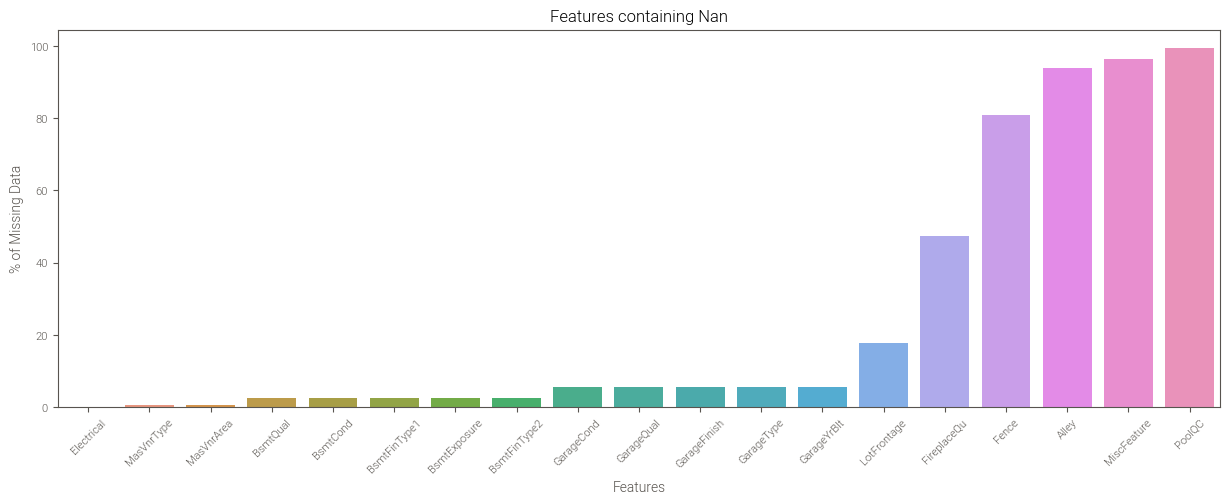

,NaN_sum,feat,Perc(%),Usability
Electrical,1,Electrical,0.068493,Keep
MasVnrType,8,MasVnrType,0.547945,Keep
MasVnrArea,8,MasVnrArea,0.547945,Keep
BsmtQual,37,BsmtQual,2.534247,Keep
BsmtCond,37,BsmtCond,2.534247,Keep
BsmtFinType1,37,BsmtFinType1,2.534247,Keep
BsmtExposure,38,BsmtExposure,2.602740,Keep
BsmtFinType2,38,BsmtFinType2,2.602740,Keep
GarageCond,81,GarageCond,5.547945,Keep
GarageQual,81,GarageQual,5.547945,Keep


In [9]:
# Looking at NaN % within the data

nan = pd.DataFrame(df.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')


# Plotting Nan

plt.figure(figsize = (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

nan


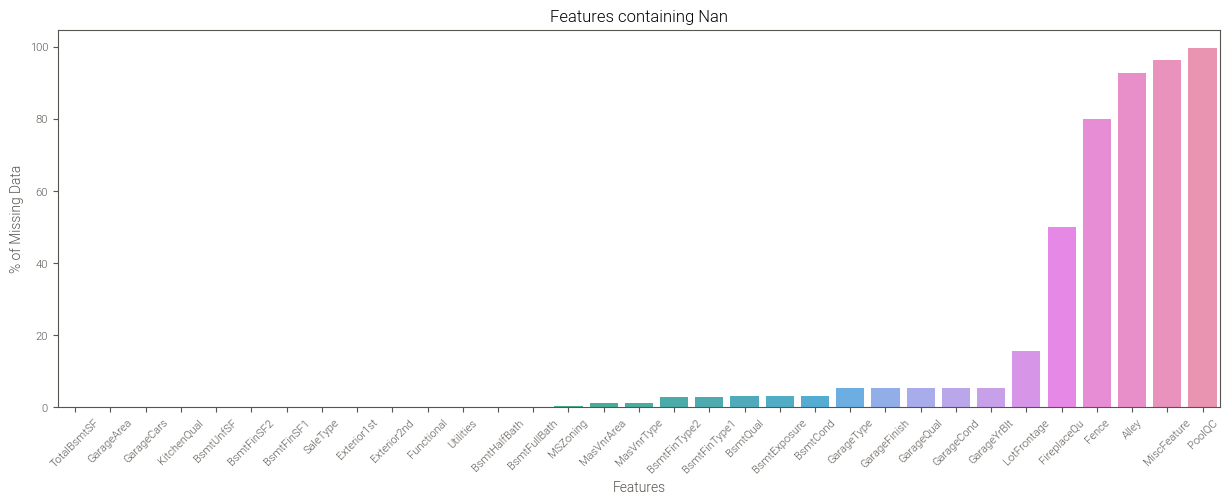

,NaN_sum,feat,Perc(%),Usability
TotalBsmtSF,1,TotalBsmtSF,0.068493,Keep
GarageArea,1,GarageArea,0.068493,Keep
GarageCars,1,GarageCars,0.068493,Keep
KitchenQual,1,KitchenQual,0.068493,Keep
BsmtUnfSF,1,BsmtUnfSF,0.068493,Keep
BsmtFinSF2,1,BsmtFinSF2,0.068493,Keep
BsmtFinSF1,1,BsmtFinSF1,0.068493,Keep
SaleType,1,SaleType,0.068493,Keep
Exterior1st,1,Exterior1st,0.068493,Keep
Exterior2nd,1,Exterior2nd,0.068493,Keep


In [10]:
# Looking at NaN % within the data

nan = pd.DataFrame(test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')


# Plotting Nan

plt.figure(figsize = (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

nan

### See the features with almost one common value

In [11]:
# checking if there is any duplicate data

df.duplicated().sum()

0

In [12]:
df["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

in training data:
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


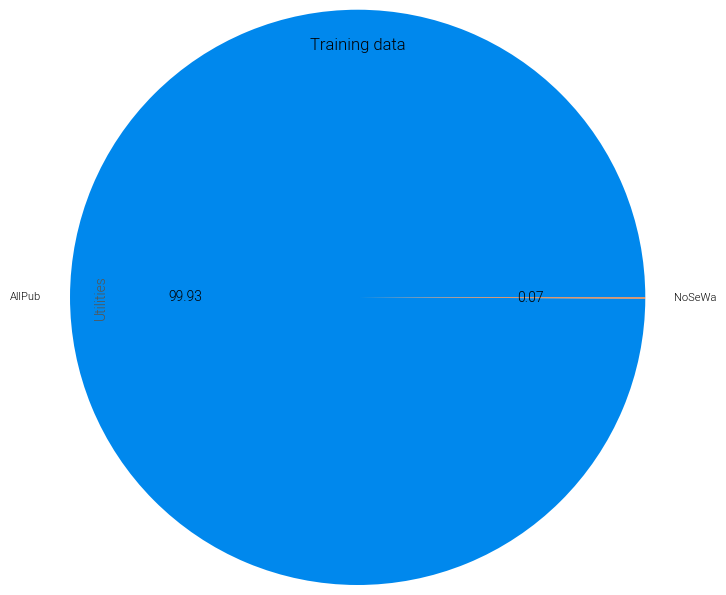

In [13]:
#we check the number of unique values in utilities feature
print('in training data:\n', df['Utilities'].value_counts())


fig,ax1 = plt.subplots(1, figsize=(8,6))
#training data
df['Utilities'].value_counts().plot(kind='pie', autopct='%.2f', radius=1.5, ax=ax1)
ax1.set(title='Training data');
plt.tight_layout()

in training data:
 AllPub    1457
Name: Utilities, dtype: int64


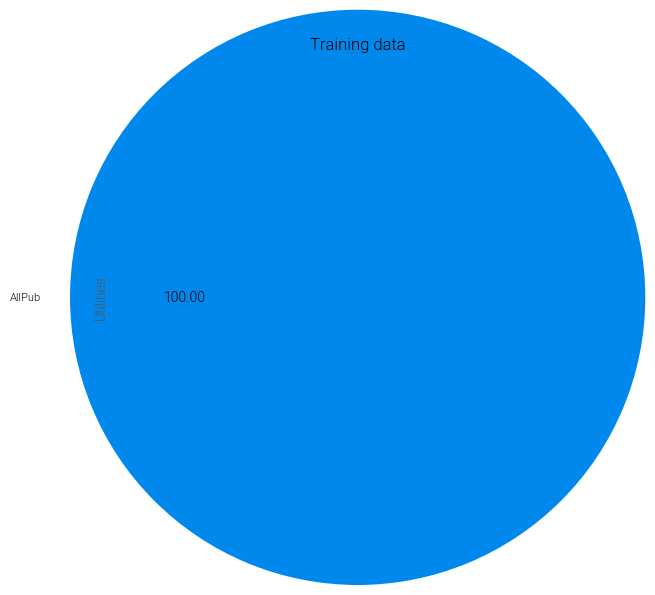

In [14]:
#we check the number of unique values in utilities feature
print('in training data:\n', test['Utilities'].value_counts())


fig,ax1 = plt.subplots(1, figsize=(8,6))
#training data
test['Utilities'].value_counts().plot(kind='pie', autopct='%.2f', radius=1.5, ax=ax1)
ax1.set(title='Training data');
plt.tight_layout()

In [15]:
# Dropping utilities because all are the same - Allpub(All public utilities) except 1 record
df.drop("Utilities", axis=1, inplace=True)
test.drop("Utilities", axis=1, inplace=True)
# Dropping ID column as it not needed in here
df.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [16]:
#Found the features with empty value
numerical_col= df.select_dtypes(exclude='object').columns
cat_col= df.select_dtypes(include='object').columns


num_NA=[]
cat_NA= []

for i,j in df[numerical_col].isnull().sum().to_dict().items():
    if j!=0:
        num_NA.append(i)
        
for i,j in df[cat_col].isnull().sum().to_dict().items():
    if j!=0:
        cat_NA.append(i)
        
numerical_col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

# del numerical_col["Index"]["SalePrice"]

for i,j in test[numerical_col].isnull().sum().to_dict().items():
        if j!=0:
            num_NA.append(i)
        
for i,j in test[cat_col].isnull().sum().to_dict().items():
        if j!=0:
            cat_NA.append(i)
        
print('Numerical features with NAN\n',num_NA)
print('Categorical features with NAN\n', cat_NA)

Numerical features with NAN
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Categorical features with NAN
 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MSZoning', 'Alley', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


#### Start replacing NAN

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


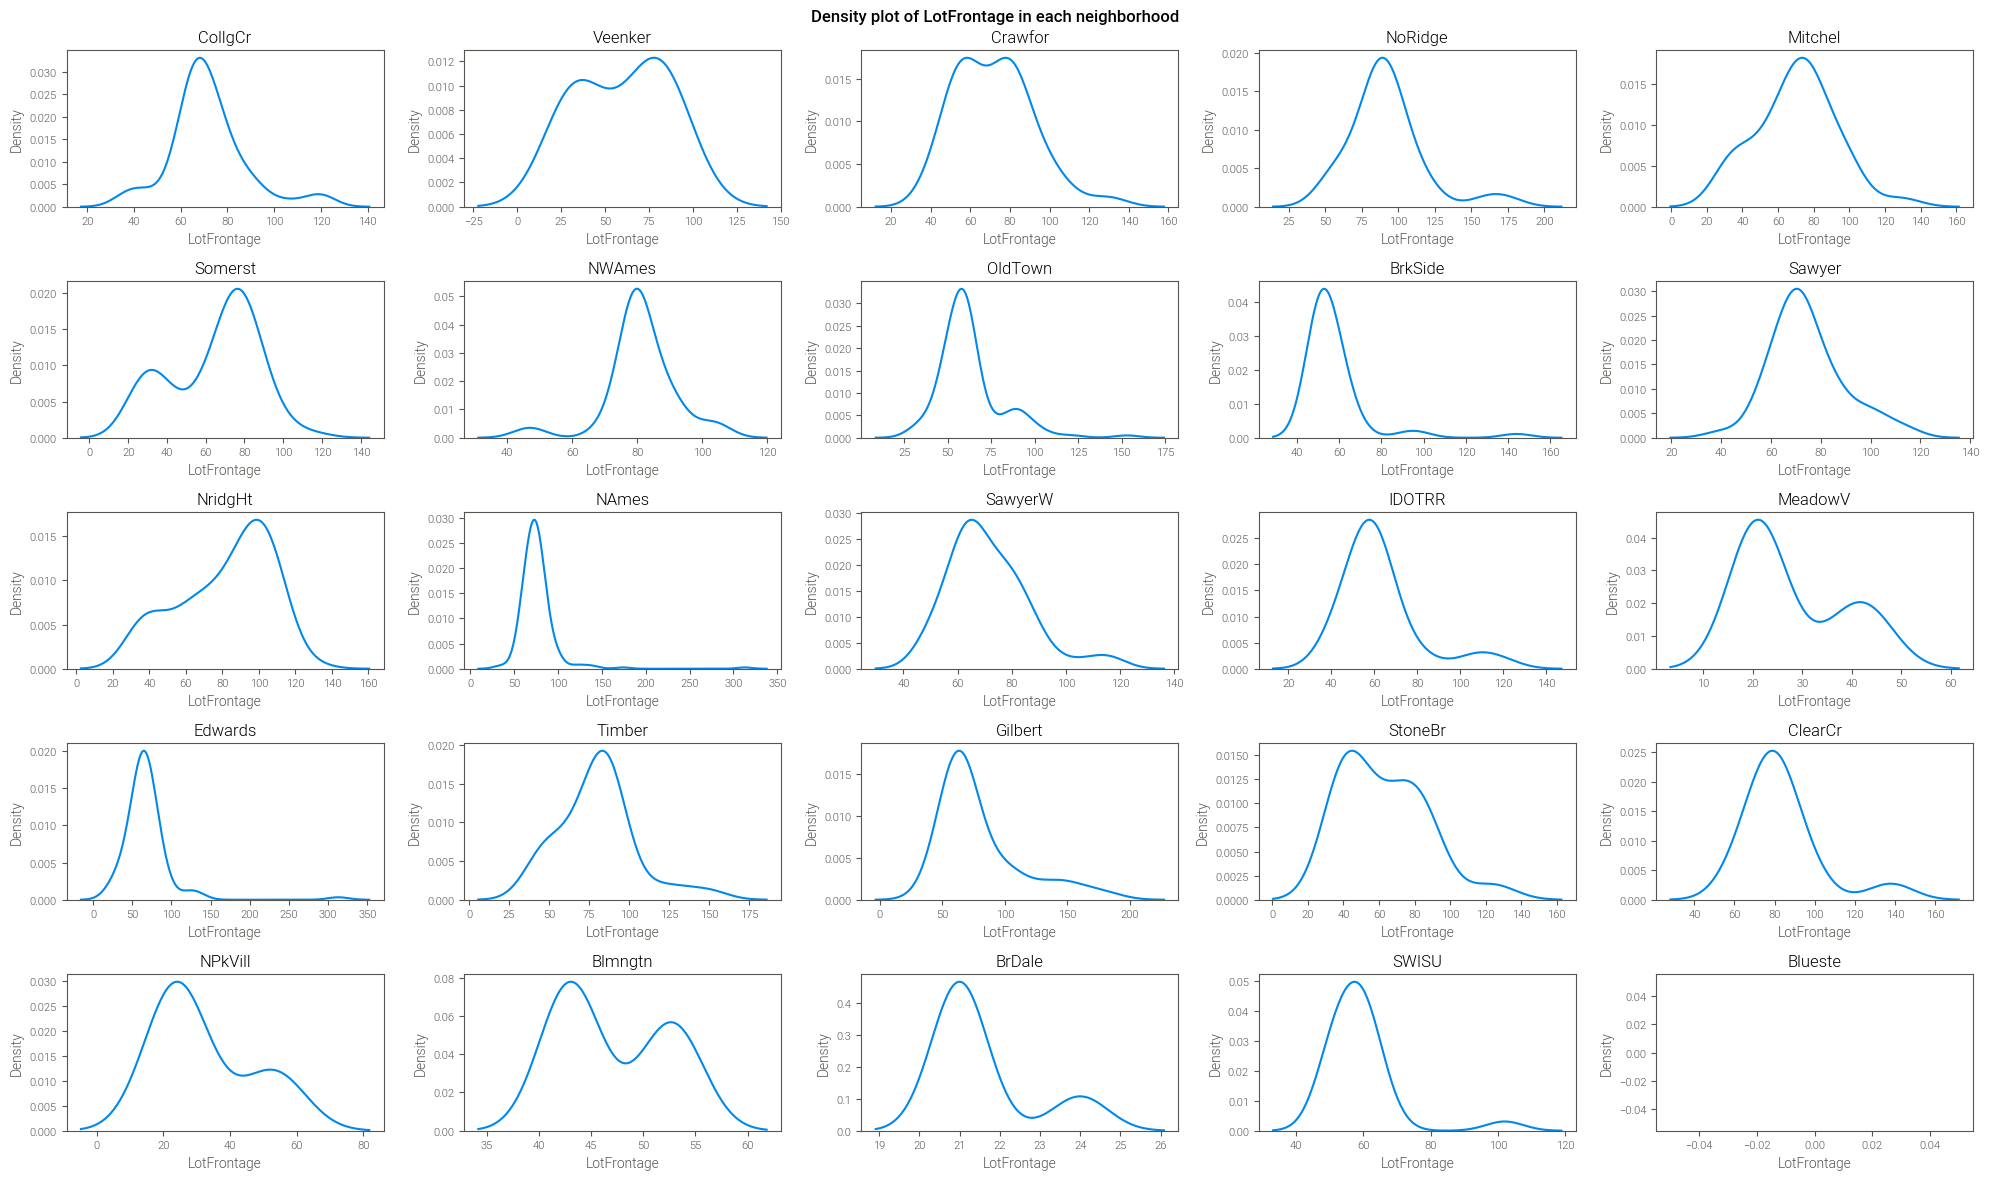

In [17]:
fig,axs = plt.subplots(5,5, figsize=(20,12))
axs = axs.ravel()

for neigh, ax in zip(df['Neighborhood'].unique(), axs):
    fig.suptitle('Density plot of LotFrontage in each neighborhood',fontweight ="bold")
    sns.kdeplot(df[df['Neighborhood'] == neigh]['LotFrontage'], ax=ax)

    ax.set_title(neigh)
    
plt.tight_layout()

In [18]:
m_LotFrontage= df.groupby(['Neighborhood'])["LotFrontage"].agg('median').to_dict()

df["LotFrontage"]= df["LotFrontage"].fillna(df['Neighborhood'].map(m_LotFrontage))


m_LotFrontage= test.groupby(['Neighborhood'])["LotFrontage"].agg('median').to_dict()

test["LotFrontage"]= test["LotFrontage"].fillna(test['Neighborhood'].map(m_LotFrontage))

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electrical', ylabel='count'>

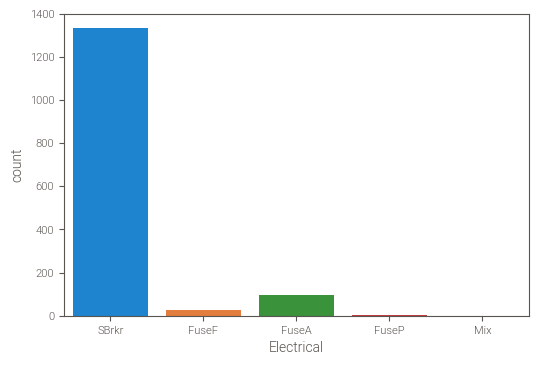

In [19]:
sns.countplot(df['Electrical'])

In [20]:
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])

test['Electrical']= test['Electrical'].fillna(test['Electrical'].mode()[0])

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

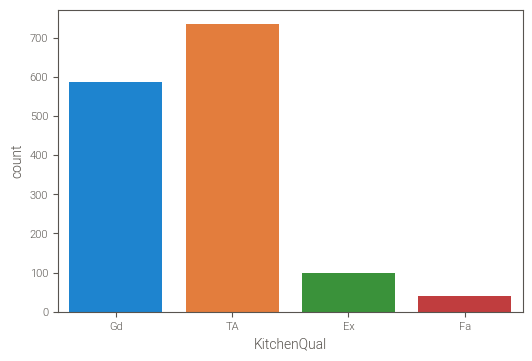

In [21]:
sns.countplot(df['KitchenQual'])

In [22]:
df['KitchenQual'] = df['KitchenQual'].fillna("TA")
test['KitchenQual'] = test['KitchenQual'].fillna("TA")

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

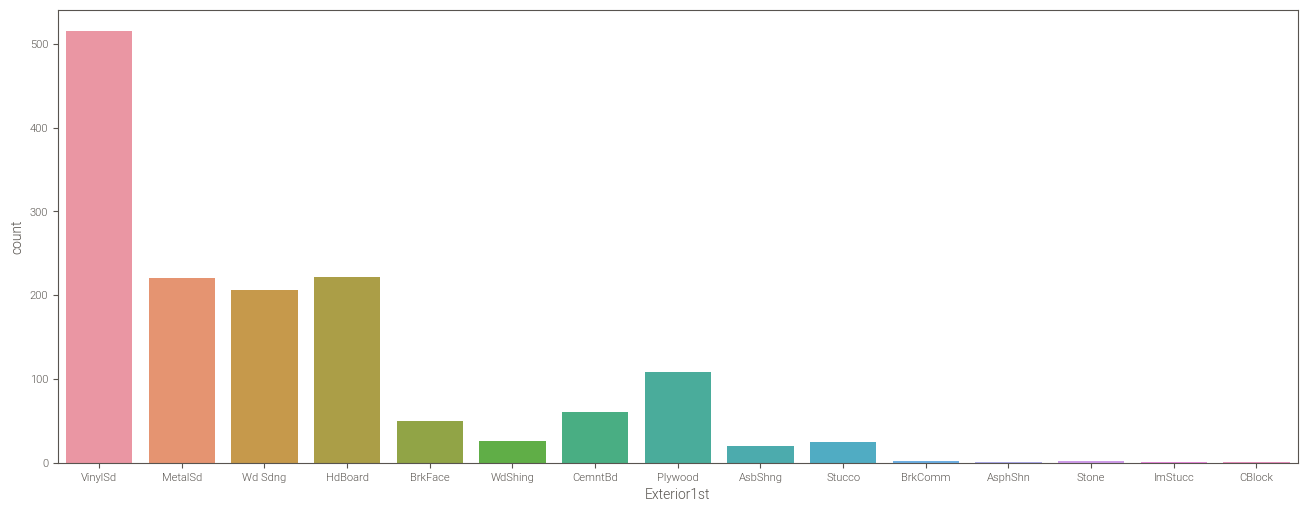

In [23]:
fig = plt.subplots( figsize=(16, 6))
sns.countplot(df['Exterior1st']) 


In [24]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])


test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Functional', ylabel='count'>

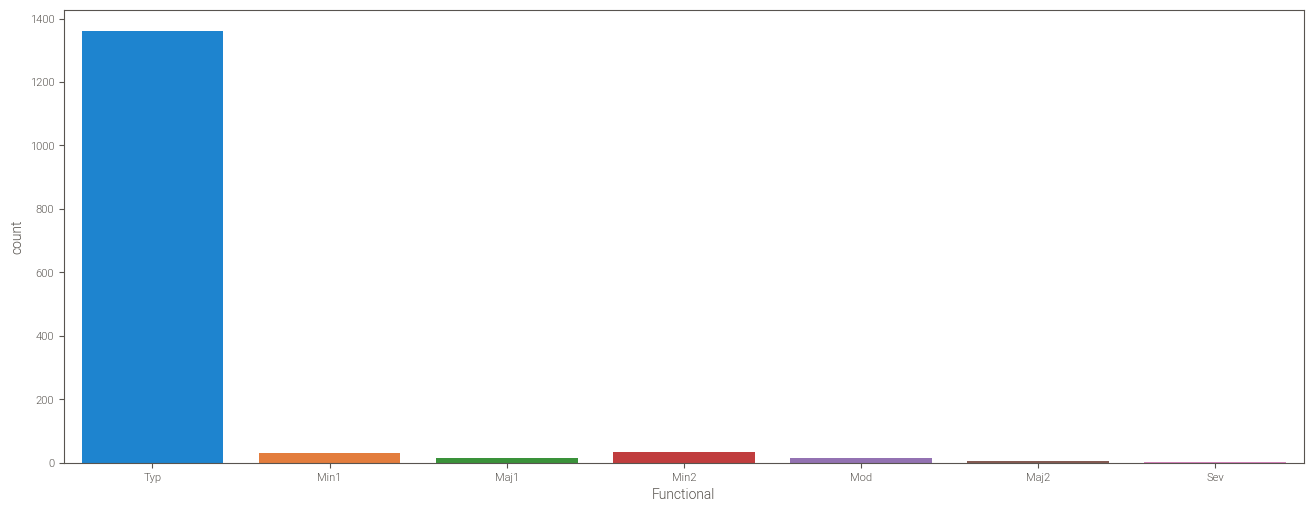

In [25]:
fig = plt.subplots( figsize=(16, 6))
sns.countplot(df['Functional']) 

In [26]:
df['Functional'] = df['Functional'].fillna('Typ')

test['Functional'] = test['Functional'].fillna('Typ')

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleType', ylabel='count'>

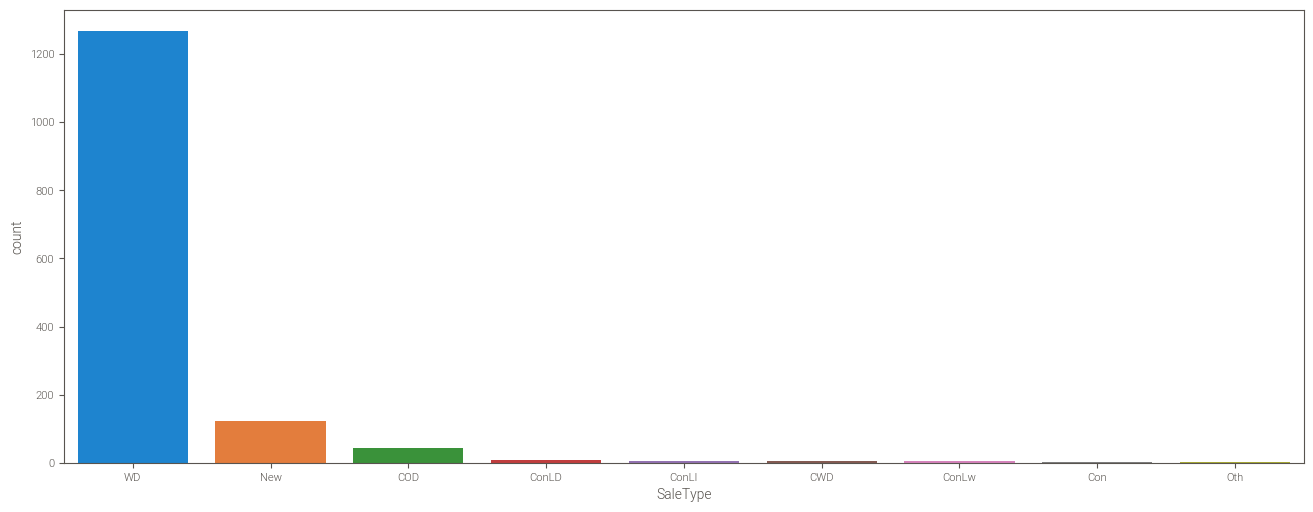

In [27]:
fig = plt.subplots( figsize=(16, 6))
sns.countplot(df['SaleType']) 

In [28]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

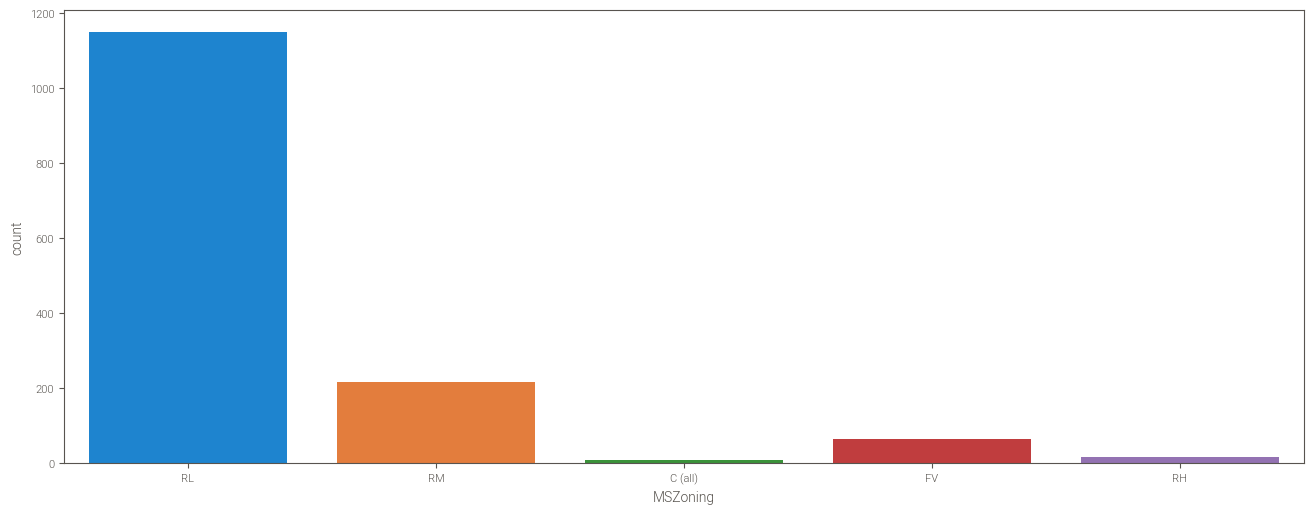

In [29]:
fig = plt.subplots( figsize=(16, 6))
sns.countplot(df['MSZoning']) 

In [30]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [31]:
# Filling Categorical NaN (That we know how to fill due to the description file )

def empty_fill(X):

    X['MasVnrType'] = X['MasVnrType'].fillna("None") #As there is some None types for Masonry veneer type


    for col in ('MasVnrArea','GarageArea', 'GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'):
        X[col] = X[col].fillna(0)
    
        
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC','Alley','FireplaceQu','Fence','MiscFeature',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        X[col] = X[col].fillna('Does Not Have')
    return X

df=empty_fill(df)
test=empty_fill(test)

In [32]:
#Checking the features with NaN remained out

missing_val(df)

,missing_ratio


In [33]:
missing_val(test)

,missing_ratio


## Analaysing Data


Finding outliers

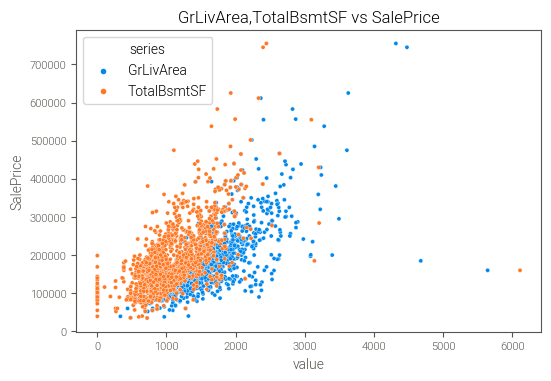

In [34]:
sns.scatterplot(x='value', hue='series', y='SalePrice',
                     data=df.melt(value_vars=['GrLivArea','TotalBsmtSF'], 
                                    id_vars='SalePrice',
                                    var_name='series'))
plt.title('GrLivArea,TotalBsmtSF vs SalePrice');

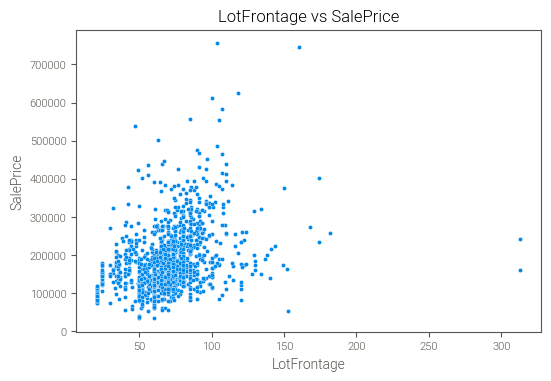

In [35]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.title('LotFrontage vs SalePrice');

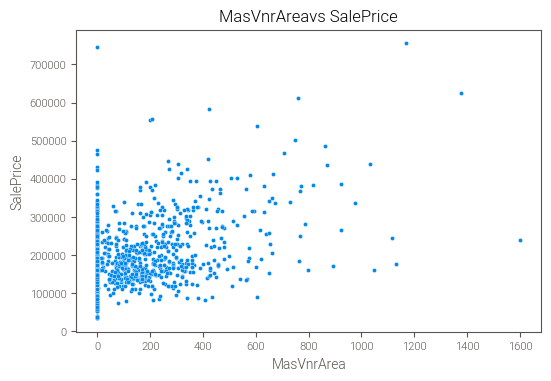

In [36]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)
plt.title('MasVnrAreavs SalePrice');

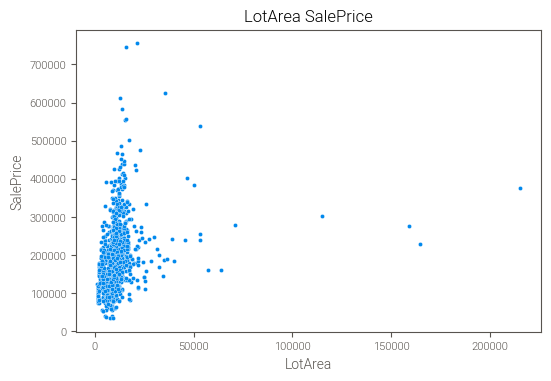

In [37]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('LotArea SalePrice');

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

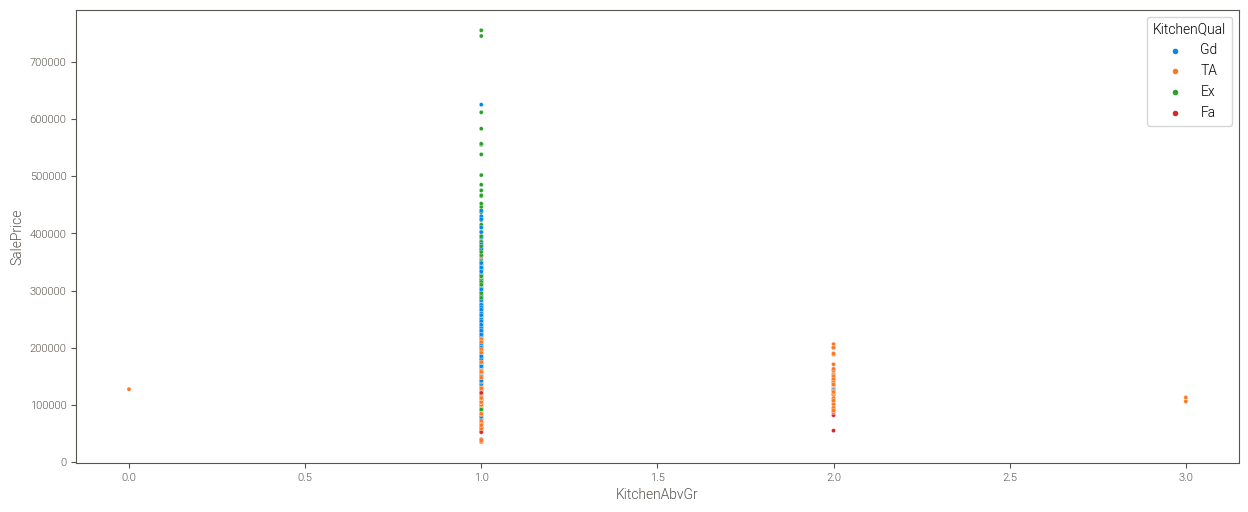

In [38]:
fig= plt.subplots(figsize=(15,6))
sns.scatterplot(x='KitchenAbvGr', hue='KitchenQual', y='SalePrice', data=df)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

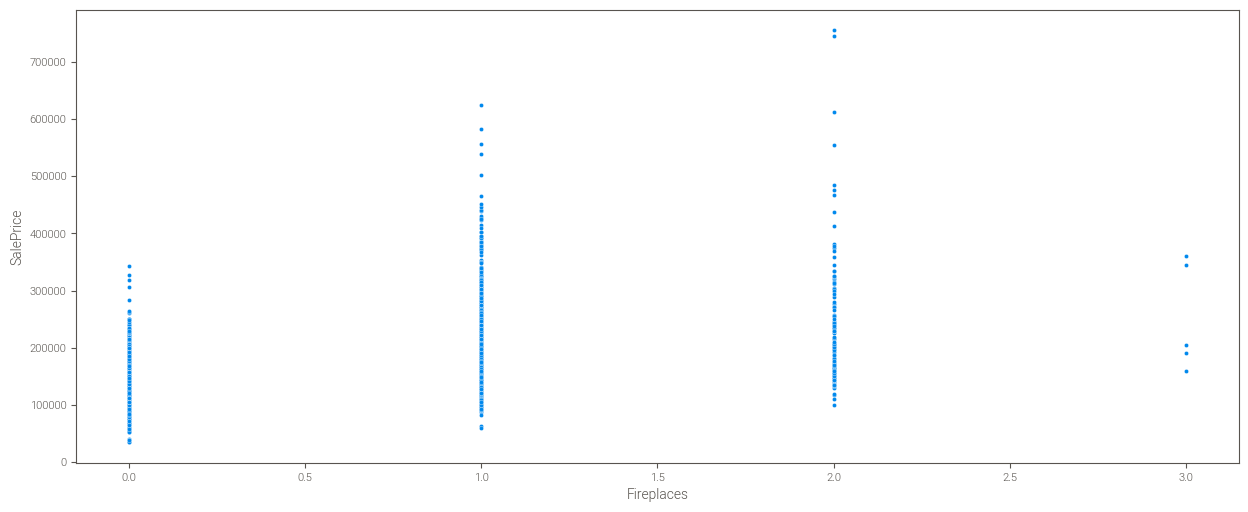

In [39]:
fig= plt.subplots(figsize=(15,6))
sns.scatterplot(x='Fireplaces',  y='SalePrice', data=df)

In [40]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

df = df.drop(df[(df['TotalBsmtSF']>6000)].index)

df = df.drop(df[(df['LotFrontage']>300)].index)

df = df.drop(df[(df['KitchenAbvGr']==0)].index)

df = df.drop(df[df['LotArea']>100000].index)

df = df.drop(df[df['MasVnrArea']>1500].index)

# df = df.drop(df[(df['Fireplaces']==3)].index)


# Feature Correlations

In [41]:
def Multicollinear_Features():
    corr = df.corr().abs()
    features = []
    correlations = []
    for idx, correlation in corr['SalePrice'].T.iteritems():
        if correlation >= .3 and idx != 'SalePrice':
            features.append(idx)
            correlations.append(correlation)
    corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features})
    Multicollinear_Features = []
    def check_multicollinearity(feature):
        for idx, correlation in corr[feature].T.iteritems():
            if correlation >= .8 and idx != feature and corr['SalePrice'].loc[feature] >= corr['SalePrice'].loc[idx]:
                Multicollinear_Features.append({'Correlations':correlation,'Features':feature,'idx': idx})

    for feature in corr:
        check_multicollinearity(feature)
    if len(Multicollinear_Features) > 0:
        MC_df = pd.DataFrame(Multicollinear_Features)
    else:
        MC_df = pd.DataFrame(columns=['Correlations', 'Features','idx'])
    print('Multicollinear Features')
    MC_df.sort_values(by='Correlations',ascending=False,inplace=True)
    MC_df.reset_index(drop=True,inplace=True)
    display(MC_df)


    corr_price_df.sort_values(by='Correlations',ascending=False,inplace=True)
    corr_price_df.reset_index(drop=True,inplace=True)
    print('Correlations with Price')
    corr_price_df = corr_price_df.loc[~corr_price_df['Features'].isin(MC_df['idx'].to_list())]
    display(corr_price_df)
    return(MC_df,corr_price_df)

MC_df,corr_price_df=Multicollinear_Features()

Multicollinear Features


,Correlations,Features,idx
0,0.887301,GarageCars,GarageArea
1,0.830156,GrLivArea,TotRmsAbvGrd
2,0.806381,TotalBsmtSF,1stFlrSF


Correlations with Price


,Correlations,Features
0,0.797515,OverallQual
1,0.734377,GrLivArea
2,0.649966,TotalBsmtSF
3,0.642339,GarageCars
6,0.561664,FullBath
8,0.526565,YearBuilt
9,0.509887,YearRemodAdd
10,0.487405,MasVnrArea
11,0.465327,Fireplaces
12,0.406763,BsmtFinSF1


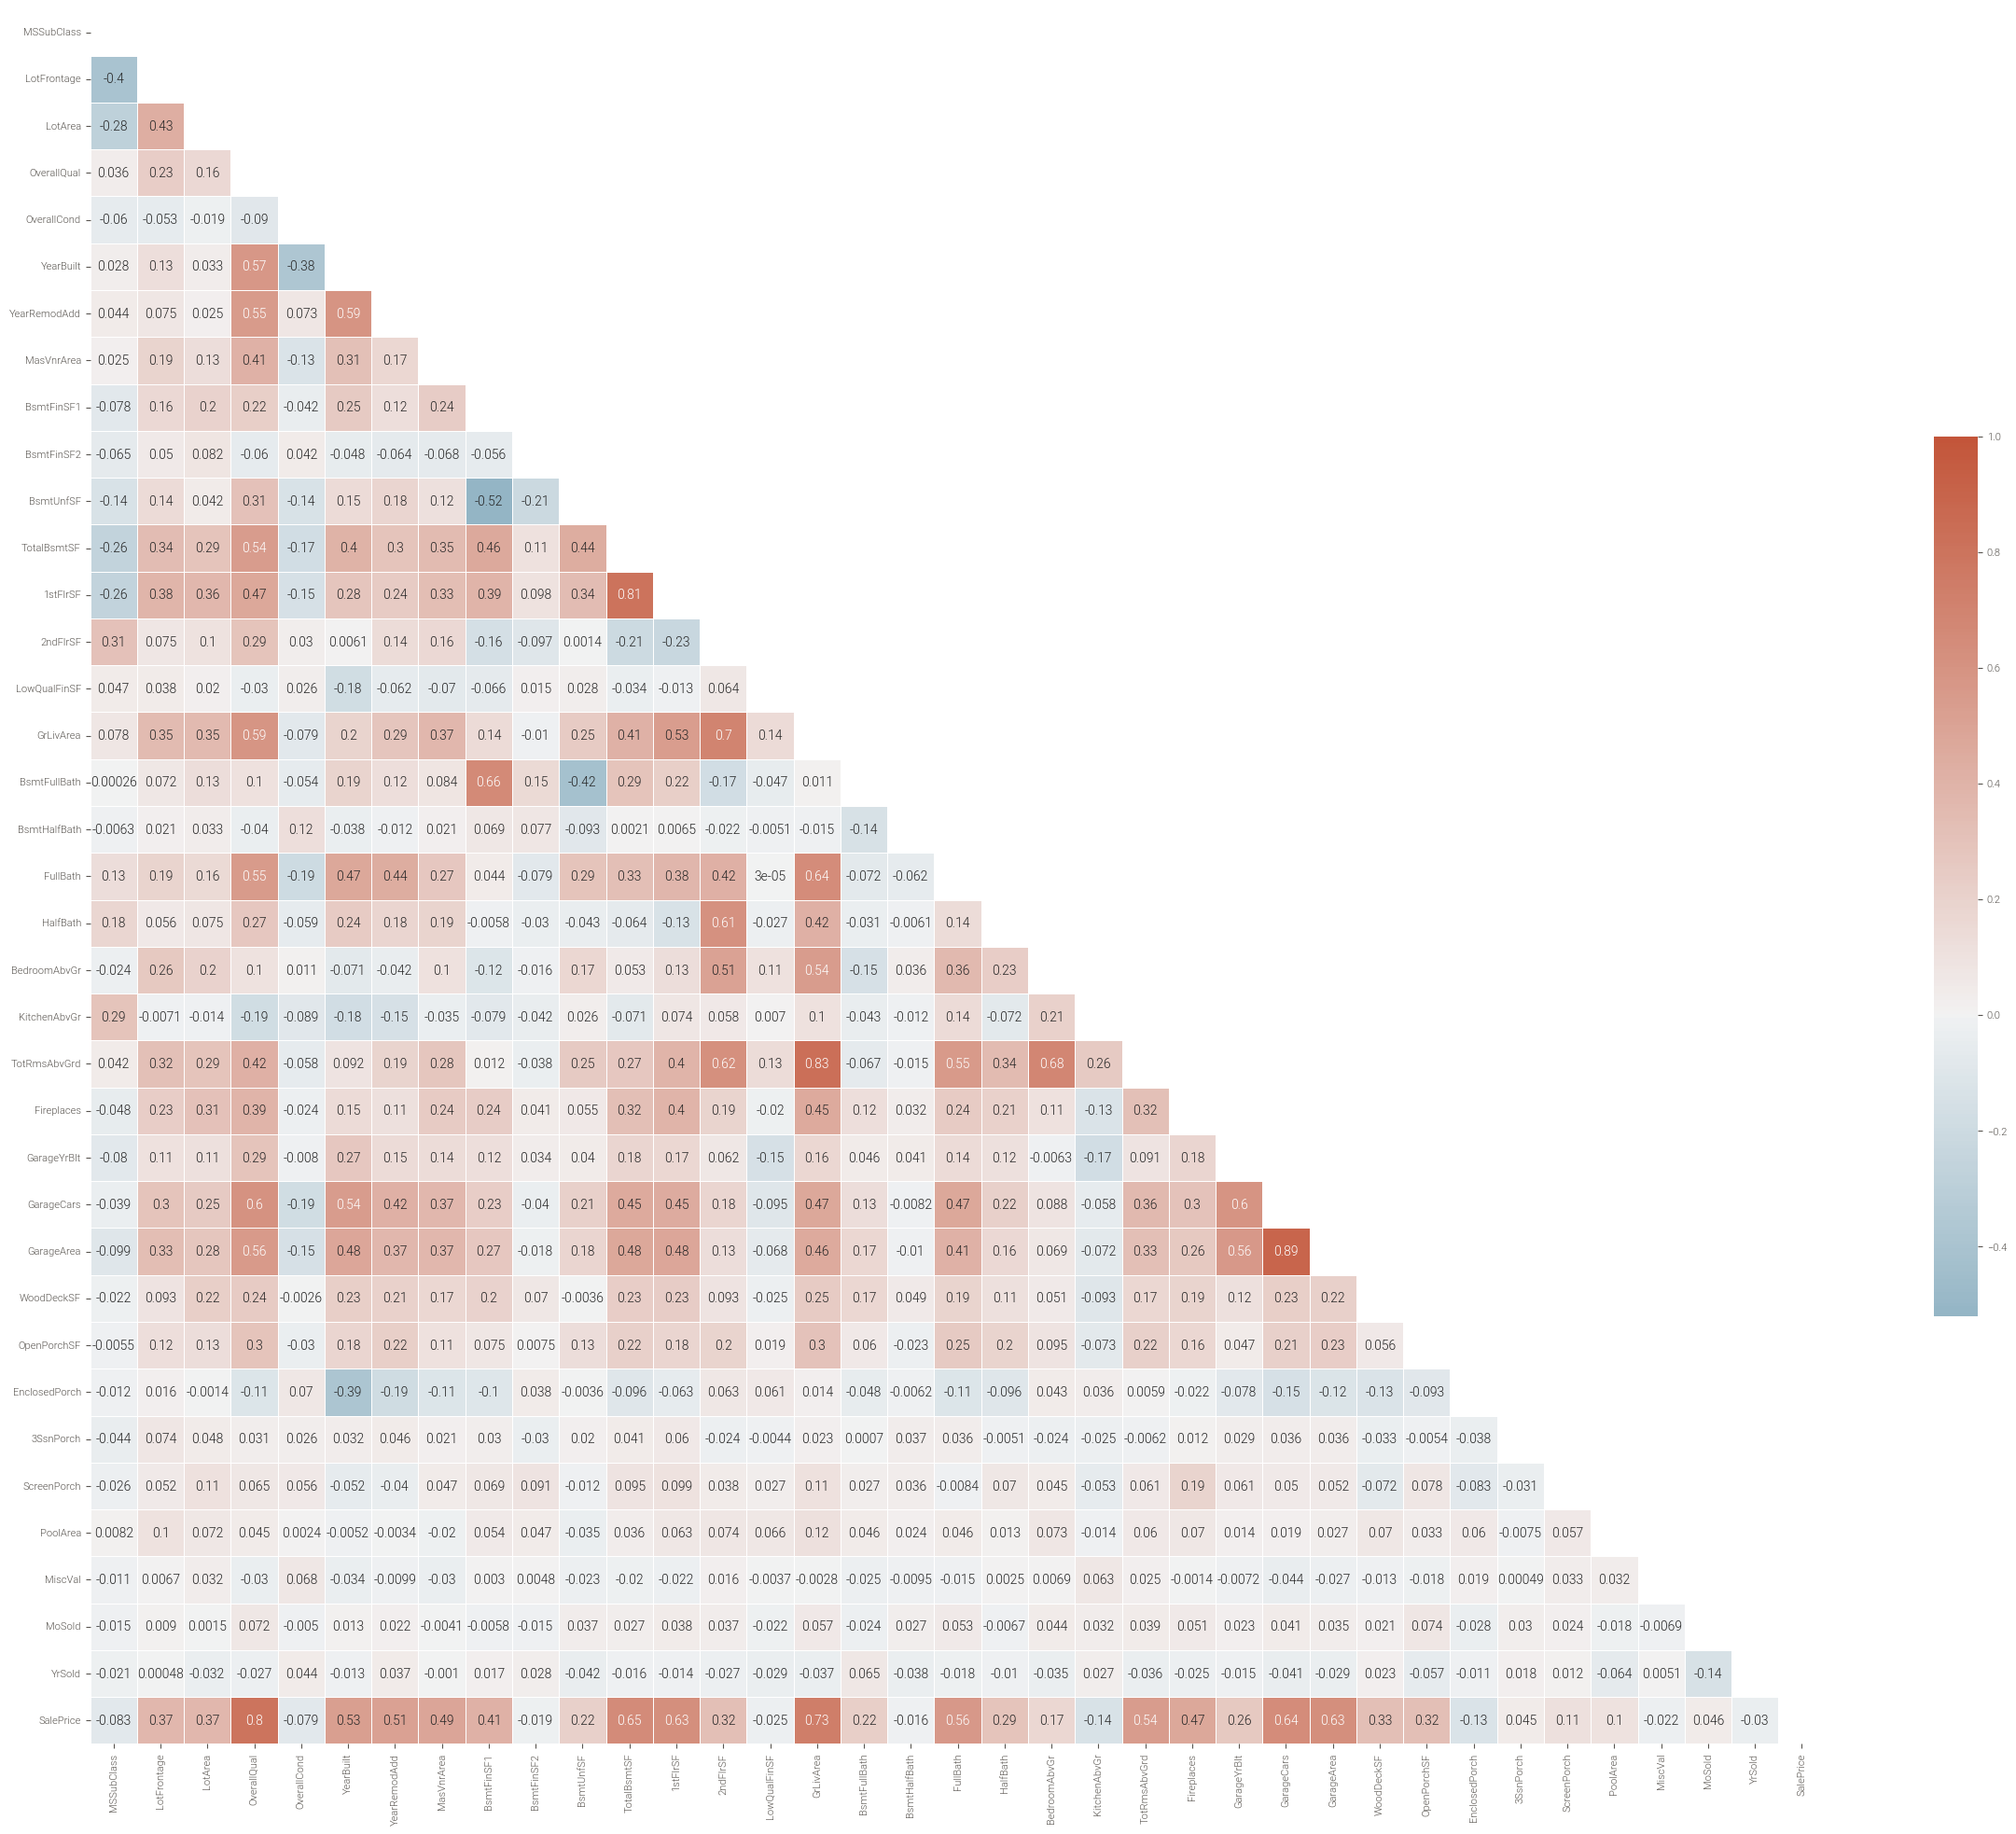

In [42]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

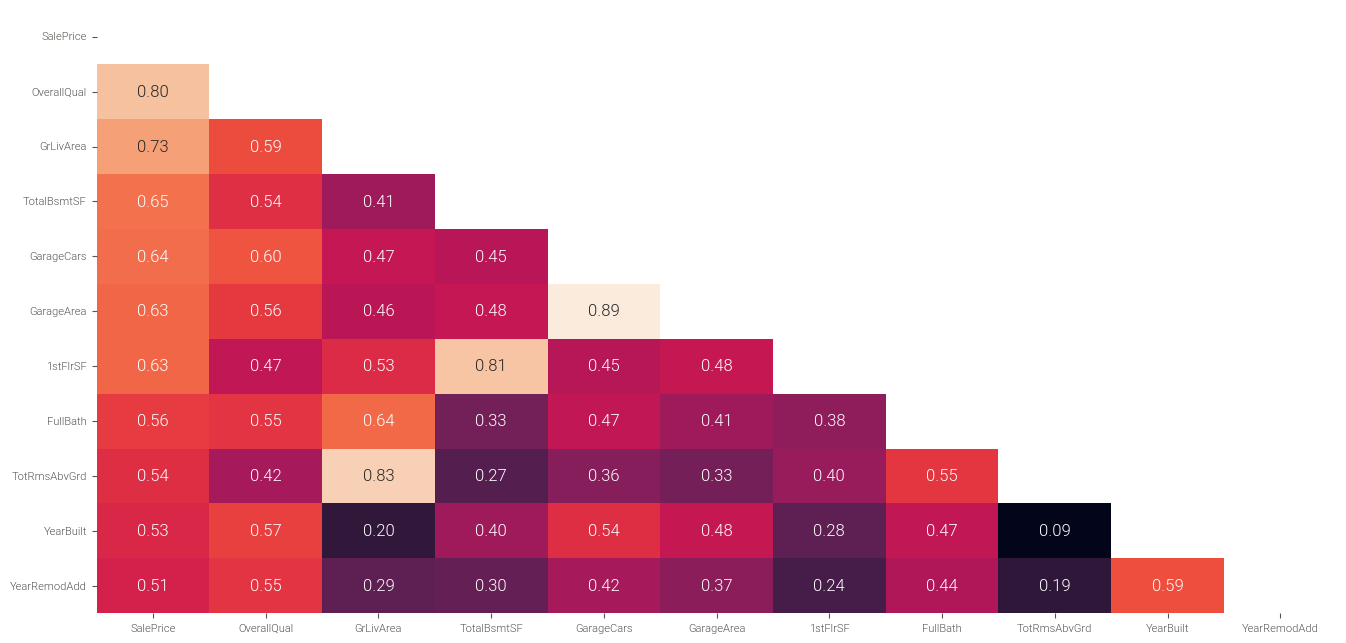

In [43]:
corr_matrix = df.corr(method='pearson')
#picking the features with largest correlations with SalePrice
x = corr_matrix.nlargest(10+1, 'SalePrice').index
df_trail = df[list(x)]
#correlation matrix of 
corr_t10 = df_trail.corr(method='pearson')
#plotting matrix
fig,ax = plt.subplots(figsize=(16, 8))
#since the matrix is mirror image along main diagonal, we plot only lower traingle 
sns.heatmap(corr_t10.where(np.tril(corr_t10, k=-1).astype(bool)), 
            annot=True, fmt='.2f', annot_kws={'size': 12},cbar=False, ax=ax);

C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180571.16 and sigma = 79338.49



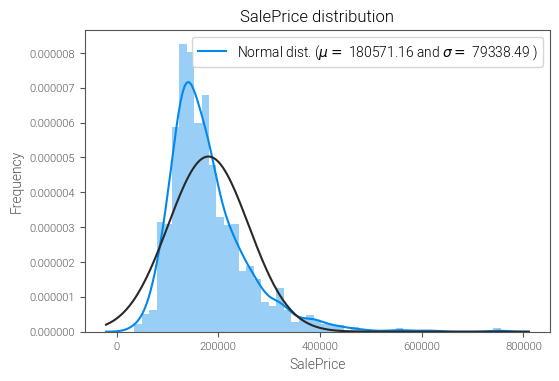

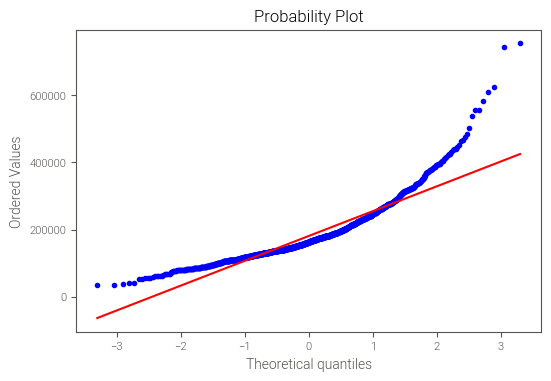

In [44]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

## Deviding the features to Nominal, Ordinal and Numerical

In [45]:
nominal_cols = ["LandContour", "LotConfig",
                "Neighborhood","Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
                "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                "MiscFeature", "MoSold", "YrSold",  "YearBuilt", "YearRemodAdd",
                "GarageYrBlt", "Street", "Alley", "LotShape", "CentralAir",
                "Fence", "PavedDrive", "LandSlope", "Electrical"]


ordinal_cols = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual",
                "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", 
                "GarageQual", "GarageCond", "Functional","PoolQC","GarageFinish", "GarageType",
               "SaleType", "SaleCondition","MSSubClass", "MSZoning"]


num_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
            "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
            "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', "MiscVal", 'PoolArea']


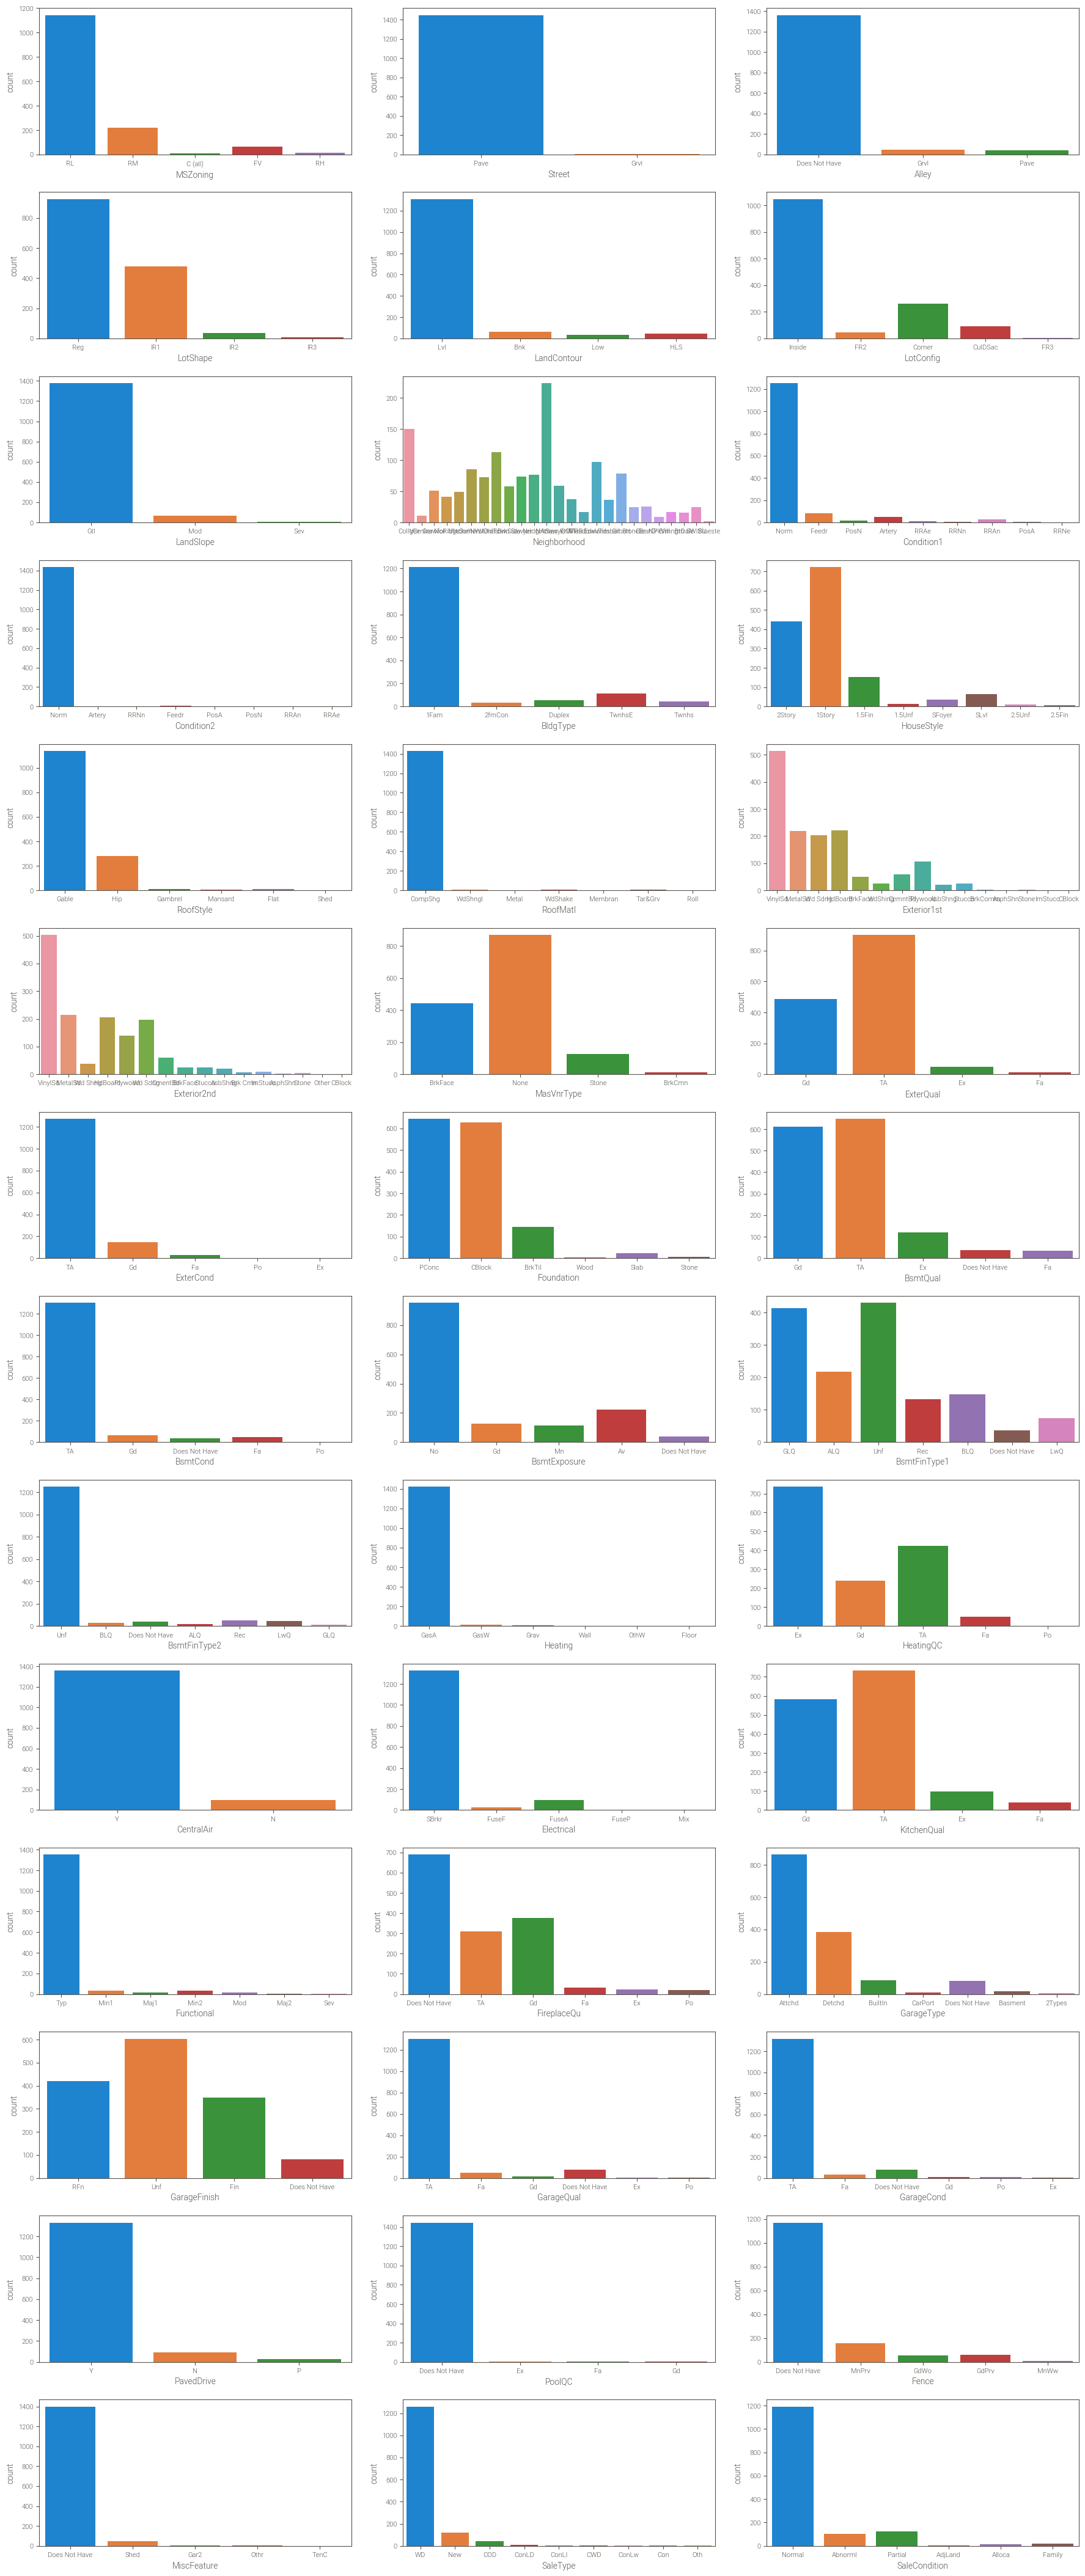

In [46]:
#Cetegorical values
cat_data = df.select_dtypes(include=['object']).copy()
fig = plt.figure(figsize=(18,45))
for ind,col in enumerate(cat_data):
    plt.subplot(15,3,ind+1)
    sns.countplot(x=df.loc[:,col],data=cat_data.dropna())

fig.tight_layout(pad=1.5)

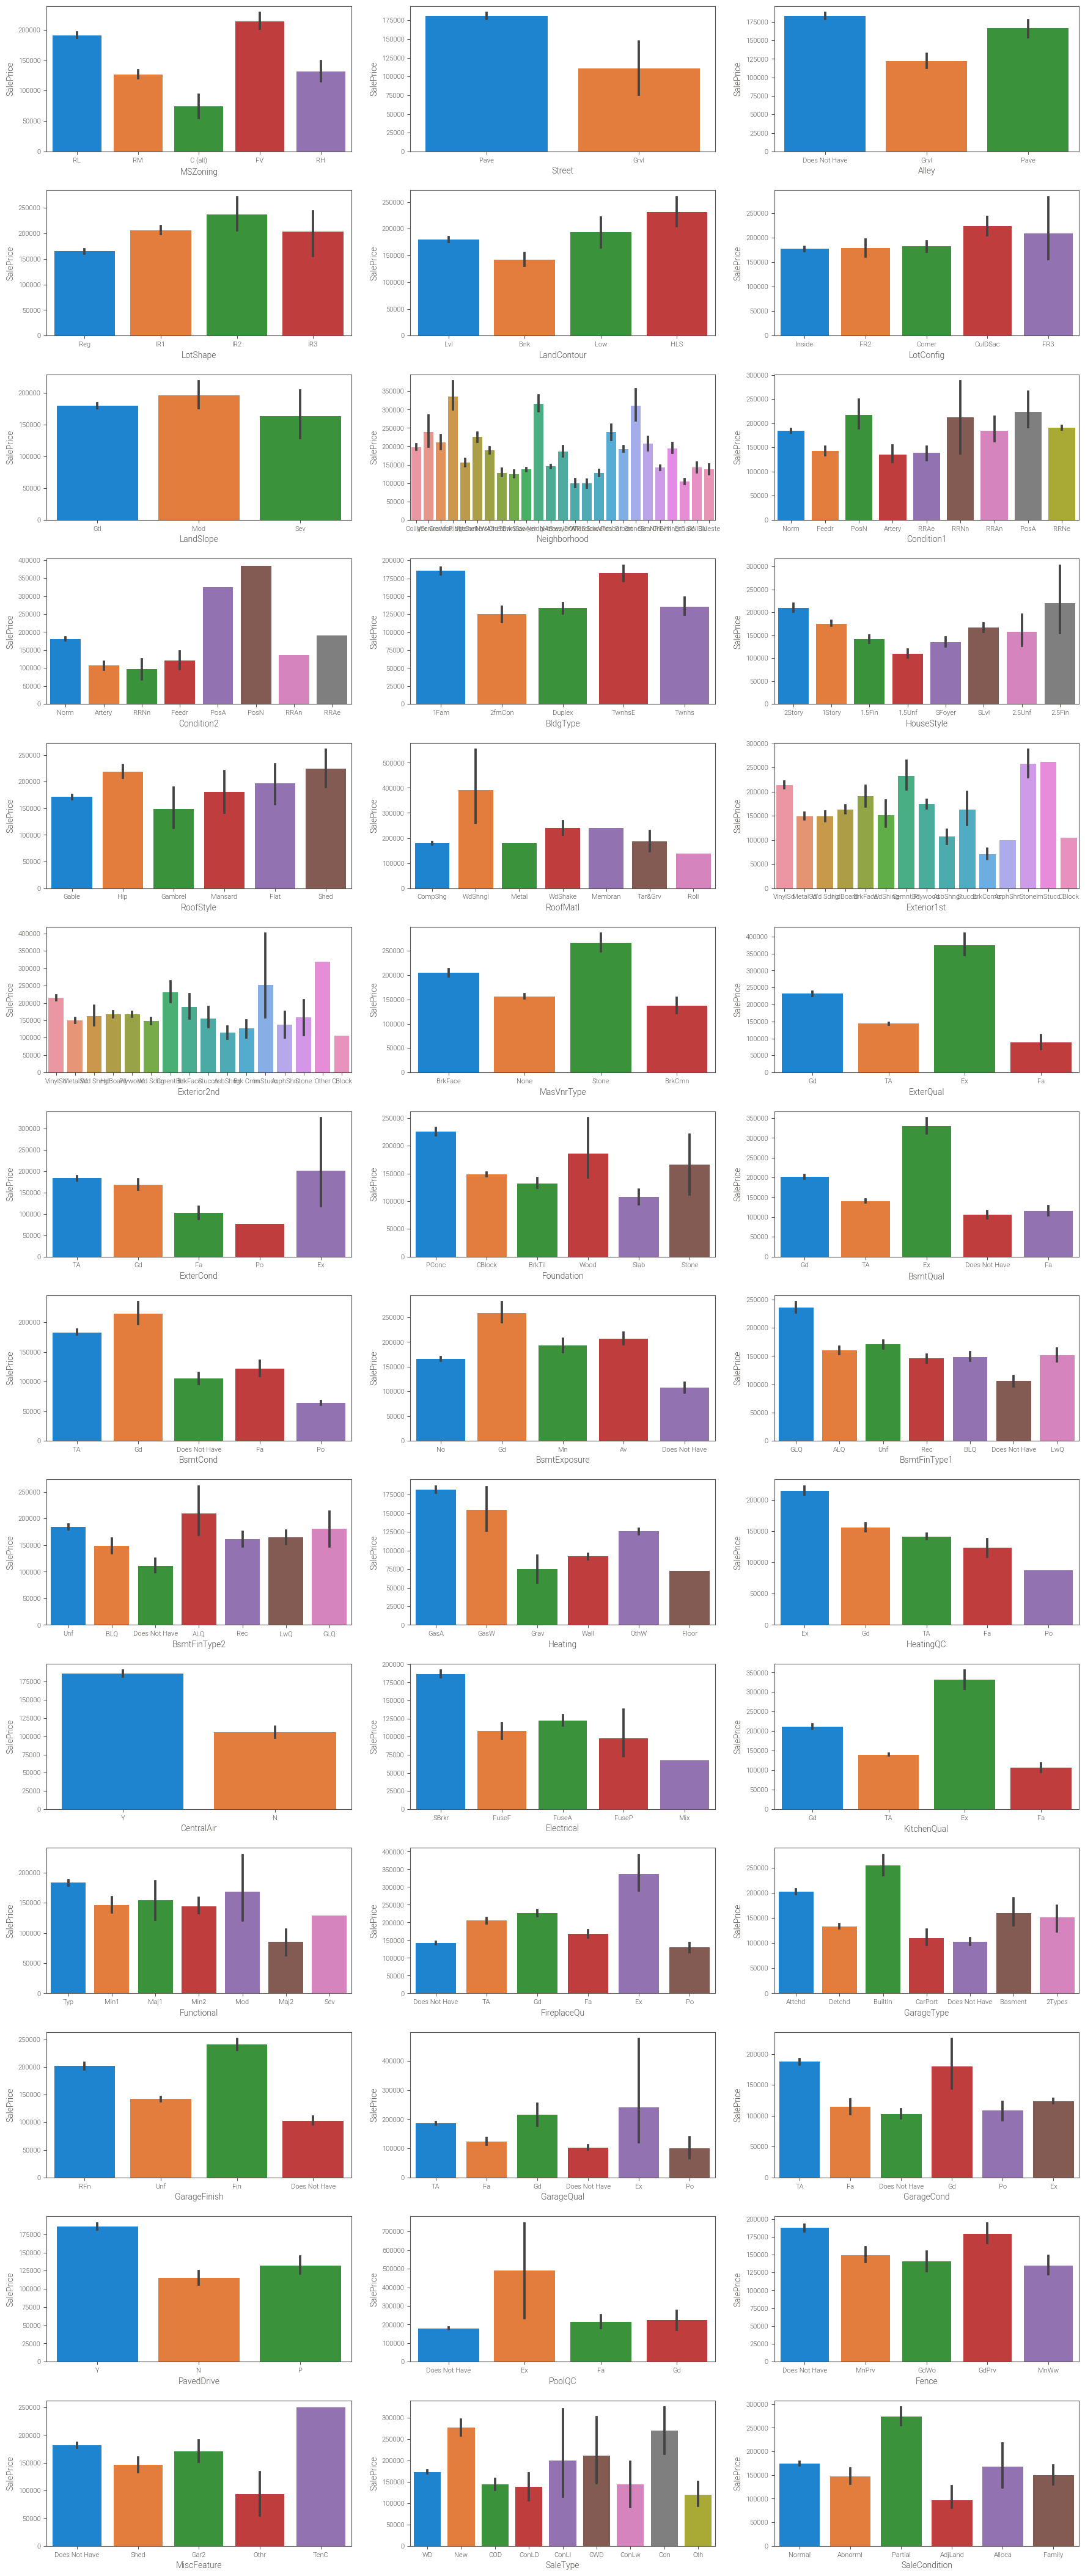

In [47]:
#Cetegorical values vs Price
cat_data = df.select_dtypes(include=['object']).copy()
fig = plt.figure(figsize=(18,45))
for ind,col in enumerate(cat_data):
    plt.subplot(15,3,ind+1)
    sns.barplot(x=df.loc[:,col],y=df["SalePrice"] ,data=cat_data.dropna())

fig.tight_layout(pad=1.5)

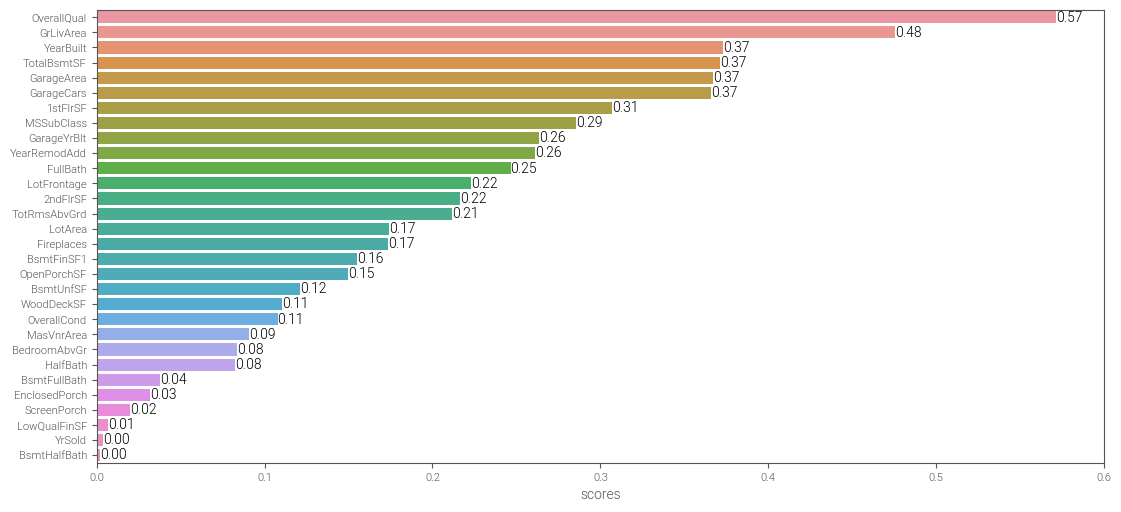

In [48]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

### Change ordinal columns into ordinal features 

In [49]:
#Ordinal feature Changing


utilities_dict = {""}

Sale_type_dict= {'Oth':0, 'ConLD':1, 'COD':2, 'ConLw':3, 'WD':4, 'ConLI':4, 'CWD':5, 'Con':6, 'New':7}

Sale_Cond_dict= {'AdjLand':0, 'Abnorml':1, 'Family':2, 'Alloca':3, 'Normal':4, 'Partial':5}

grage_type_dict= {"Does Not Have":0,  'CarPort':1, 'Detchd':2, '2Types':3, 'Basment':4, 'Attchd':5, 'BuiltIn':6 }

alley_dict= {'Grvl':0, 'Pave':1, 'Does Not Have':2}

LotShape_dict = {"IR3":0, 'IR2':1, 'IR1':2, 'Reg':3}

centeral_Air_dict= {"N":0, "Y":1}

Street_dict = {"Grvl": 0, "Pave": 1}

MSSubClass_dict= {30:0,180:1,45:2,190:3,90:4,160:5,50:6,85:7,40:8,80:9,70:10,20:11,75:12,120:13,60:14,150:15} 

MSZoning_dict= {'C (all)':0, 'RM':2,'RH':3,'RL':4,'FV':5}

fence_dict= {'Does Not Have':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

paved_drive_dict={'N':0, 'P':1, 'Y':2}

land_slope_dict={'Sev':0, 'Mod':1, 'Gtl':2}

grage_finish_dict={'Does Not Have':0, 'Unf':1, 'RFn':2, 'Fin':3}

electrical_dict= {'Mix':0, 'FuseP':1, 'FuseF':2,'FuseA':3, 'SBrkr':4}

exterior_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

exterior_condition_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

basement_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

basement_condition_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

basement_exposure_dict = {"Does Not Have": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}

basement_fin_type1_dict = {"Does Not Have": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}

basement_fin_type2_dict = {"Does Not Have": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}

heating_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

kitchen_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

fireplace_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

garage_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

garage_condition_dict= {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

pool_quality_dict = {"Does Not Have": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

functional_dict = {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7}

In [50]:
def convert(X):

    X["Street_0"] = X["Street"].map(Street_dict)

    X["Alley_0"] = X["Alley"].map(alley_dict)

    X["LotShape_0"] = X["LotShape"].map(LotShape_dict)

    X["CentralAir_0"] = X["CentralAir"].map(centeral_Air_dict)

    X["GarageType_0"] = X["GarageType"].map(grage_type_dict)

    X["Fence_0"] = X["Fence"].map(fence_dict)

    X["PavedDrive_0"] = X["PavedDrive"].map(paved_drive_dict)

    X["LandSlope_0"] = X["LandSlope"].map(land_slope_dict)

    X["GarageFinish_0"] = X["GarageFinish"].map(grage_finish_dict)

    X["Electrical_0"] = X["Electrical"].map(electrical_dict)

    X["SaleCondition_0"]=X["SaleCondition"].map(Sale_Cond_dict)

    X["SaleType_0"]=X["SaleType"].map(Sale_type_dict)

    X['MSSubClass_0']=X['MSSubClass'].map(MSSubClass_dict)

    X['MSZoning_0']=X['MSZoning'].map(MSZoning_dict)

    X["ExterQual_0"] = X["ExterQual"].map(exterior_quality_dict)

    X["ExterCond_0"] = X["ExterCond"].map(exterior_condition_dict)

    X["BsmtQual_0"] = X["BsmtQual"].map(basement_quality_dict)

    X["BsmtCond_0"] = X["BsmtCond"].map(basement_condition_dict)

    X["BsmtExposure_0"] = X["BsmtExposure"].map(basement_exposure_dict)

    X["BsmtFinType1_0"] = X["BsmtFinType1"].map(basement_fin_type1_dict)

    X["BsmtFinType2_0"] = X["BsmtFinType2"].map(basement_fin_type2_dict)

    X["HeatingQC_0"] = X["HeatingQC"].map(heating_quality_dict)

    X["KitchenQual_0"] = X["KitchenQual"].map(kitchen_quality_dict)

    X["FireplaceQu_0"] = X["FireplaceQu"].map(fireplace_quality_dict)

    X["GarageQual_0"]= X["GarageQual"].map(garage_quality_dict)

    X["GarageCond_0"]= X["GarageCond"].map(garage_condition_dict)

    X["PoolQC_0"]= X["PoolQC"].map(pool_quality_dict)

    X["Functional_0"]=X["Functional"].map(functional_dict)
    return X

df=convert(df)
test=convert(test)

# Feature Engineering (Adding more features)

In [51]:
#Total SF of the house
df["AggSF"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]
test["AggSF"] = test["GrLivArea"] + test["TotalBsmtSF"] + test["GarageArea"]

In [52]:
#bath features
bath_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#mi scores
print('mi scores with SalePrice\n', df_mi_score[bath_cols].sort_values(ascending=False))
#pearson correlation
print('\npearson correlation coefficient\n', corr_matrix.loc[bath_cols, 'SalePrice'].sort_values(ascending=False))

mi scores with SalePrice
 FullBath        0.246543
HalfBath        0.082237
BsmtFullBath    0.037970
BsmtHalfBath    0.002236
Name: scores, dtype: float64

pearson correlation coefficient
 FullBath        0.561664
HalfBath        0.288702
BsmtFullBath    0.223707
BsmtHalfBath   -0.015950
Name: SalePrice, dtype: float64


we devise a metric (bathroom score), which gives an overall score to bathrooms in a house

In [53]:
df['bath_score'] = df.apply(lambda x: 
                              (2*x['FullBath'])+(1*x['HalfBath'])+(0.5*x['BsmtFullBath'])+(0.25*x['BsmtHalfBath']), axis=1)


test['bath_score'] = test.apply(lambda x: 
                              (2*x['FullBath'])+(1*x['HalfBath'])+(0.5*x['BsmtFullBath'])+(0.25*x['BsmtHalfBath']), axis=1)

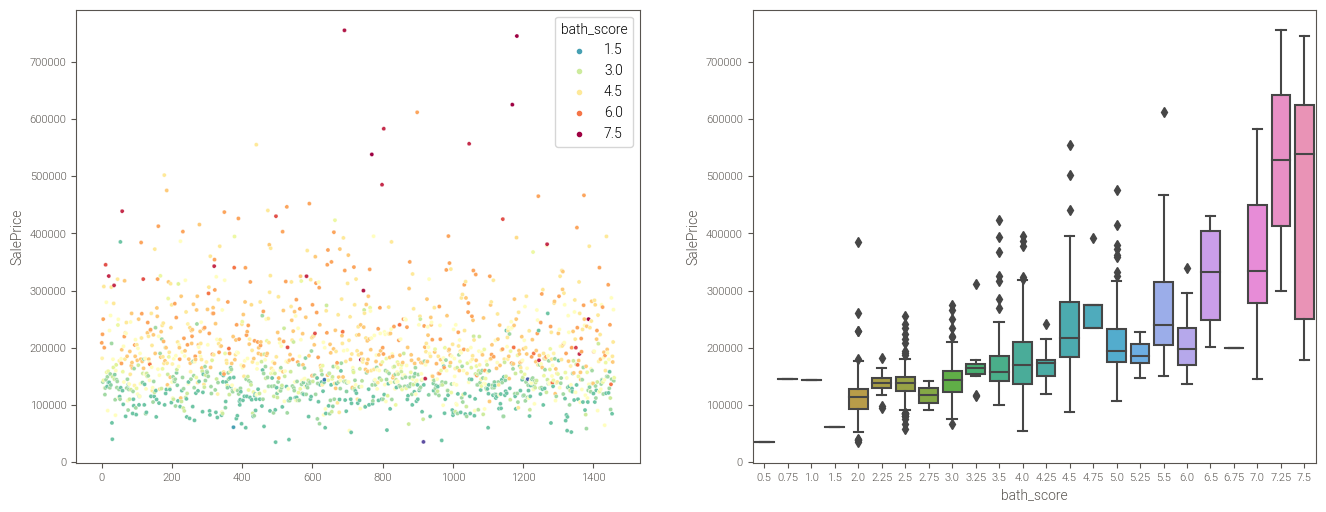

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16, 6))
#scatterplot
sns.scatterplot(x=df.index, y='SalePrice', data=df, hue='bath_score', 
                palette='Spectral_r', ax=ax1)
#boxplot
sns.boxplot(x ='bath_score', y='SalePrice', data=df, ax=ax2);

Instead of 5 different features, we combine these features to get total porch area and the number of the porch of the house

In [55]:
porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


df['porch_area']= df[porch_cols].sum(axis=1) 
df['n_porch'] = df[porch_cols].gt(0).sum(axis=1)


test['porch_area']= test[porch_cols].sum(axis=1) 
test['n_porch'] = test[porch_cols].gt(0).sum(axis=1)

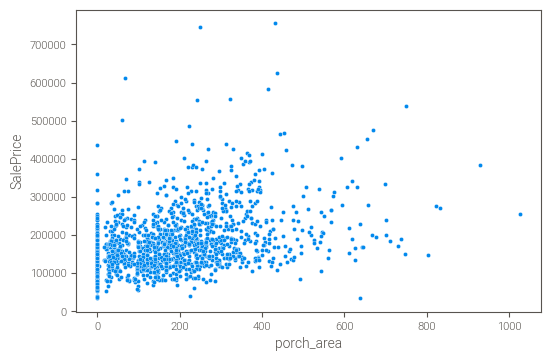

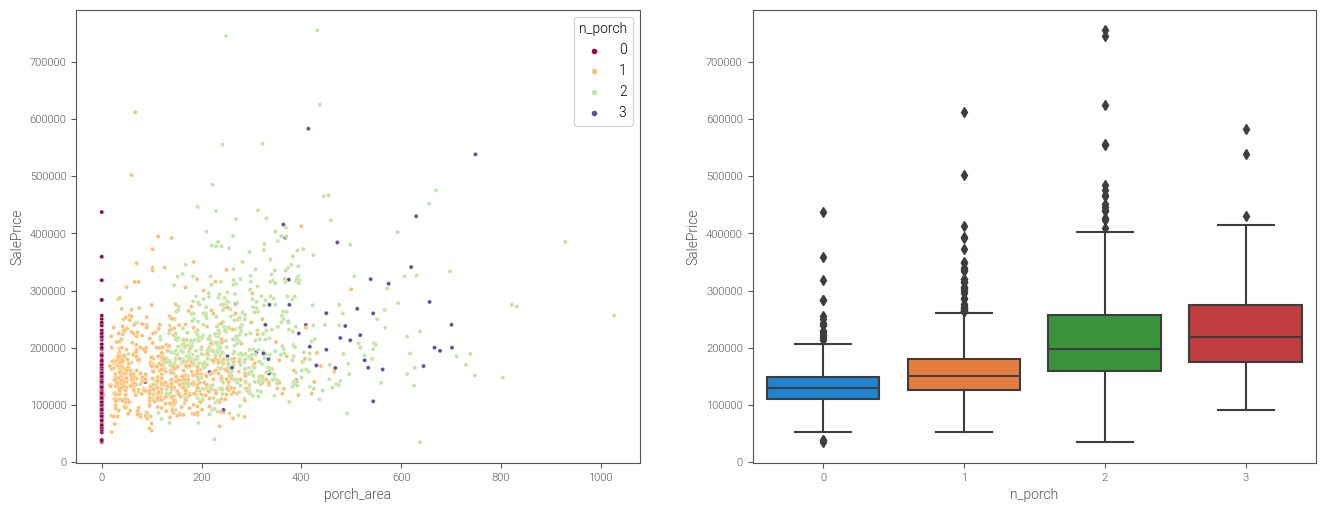

In [56]:
sns.scatterplot(x='porch_area', y='SalePrice', data=df);
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(x='porch_area', y='SalePrice', hue='n_porch', data=df, palette='Spectral',ax=ax1);
sns.boxplot(x='n_porch', y='SalePrice', data=df, ax=ax2);

feature indicating presence of a pool(a categorical variable) and also a pool score

In [57]:
df["pool"]= df['PoolArea'].apply(lambda x: (0,1)[x>0])
df['pool_score']=df.apply(lambda x:x['pool']*x['PoolQC_0'], axis=1)


test["pool"]= test['PoolArea'].apply(lambda x: (0,1)[x>0])
test['pool_score']=test.apply(lambda x:x['pool']*x['PoolQC_0'], axis=1)

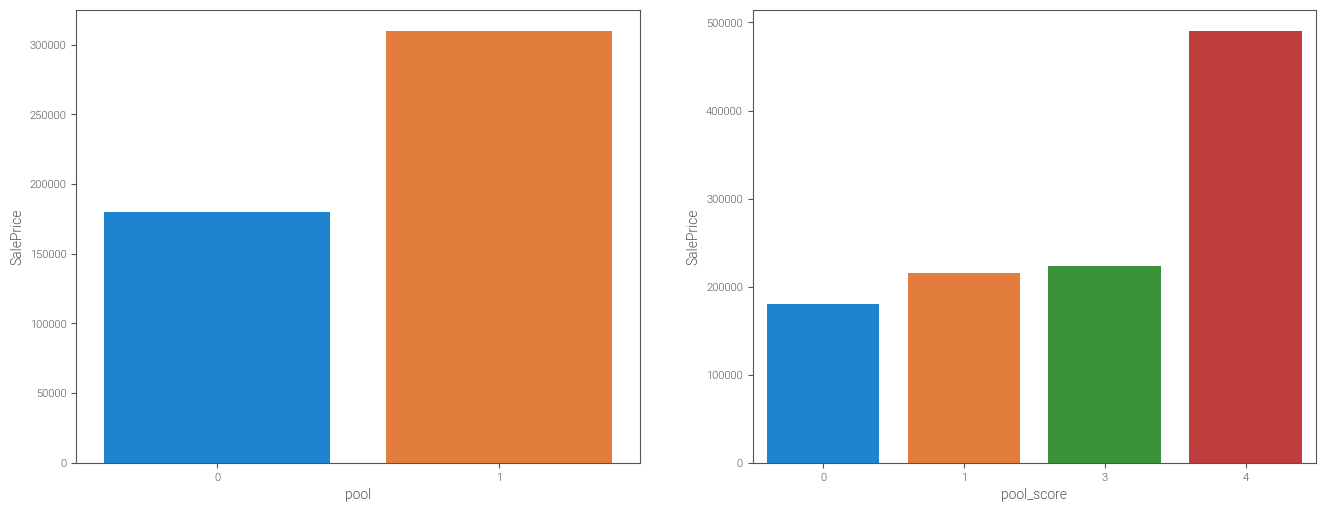

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.barplot(y='SalePrice', x='pool', data=df, ci=None, ax=ax1);
sns.barplot(y='SalePrice', x='pool_score', data=df, ci=None,ax=ax2);

feature HeatingQc_fireplace_fireplaceQc_score that combines both the heating and fireplace features

In [59]:

df['heat_fireplace_fQc']= df['HeatingQC_0']*df['Fireplaces']*df['FireplaceQu_0']


test['heat_fireplace_fQc']= test['HeatingQC_0']*test['Fireplaces']*test['FireplaceQu_0']

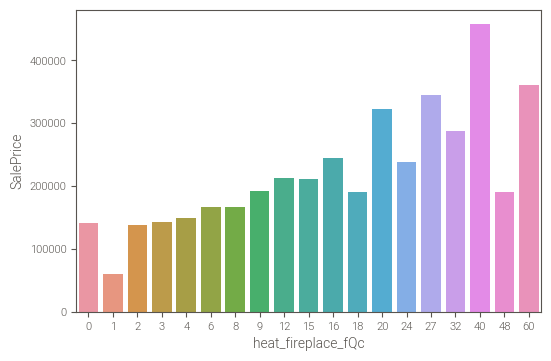

In [60]:
#plot
sns.barplot(x='heat_fireplace_fQc', y='SalePrice', data=df, ci=None);

OverallQual,OverallCond:We combine them to generate an overall score for the house

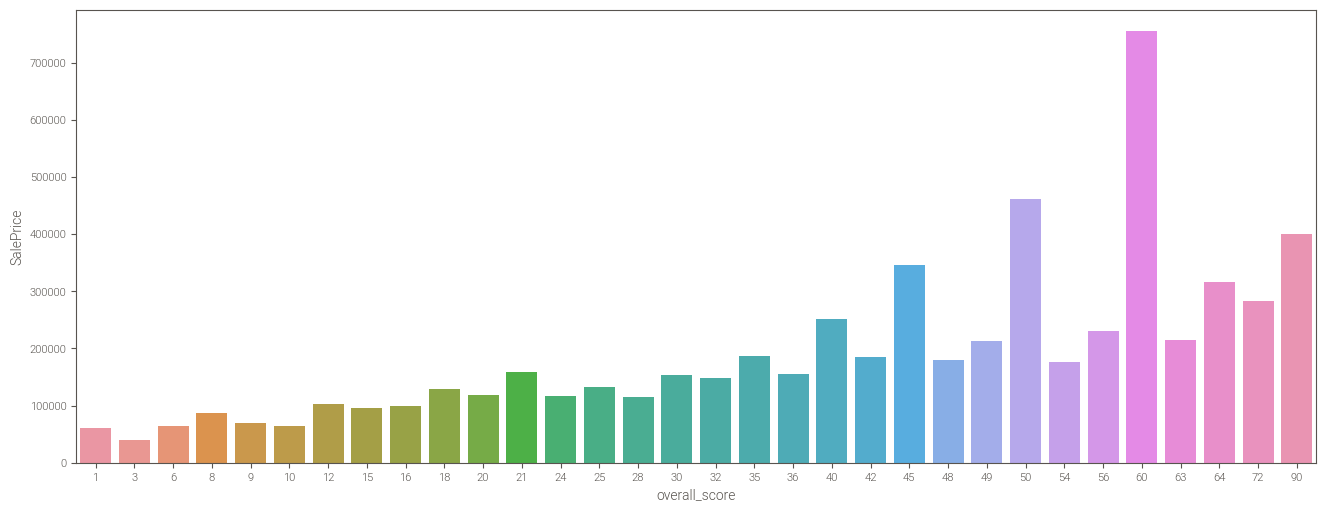

In [61]:
df['overall_score'] = df['OverallQual'] * df['OverallCond']

test['overall_score'] = test['OverallQual'] * test['OverallCond']

plt.figure(figsize=(16,6))
sns.barplot(x='overall_score', y='SalePrice', data=df, ci=None);

ExterQual,ExterCond: we combine them to get an exterior score

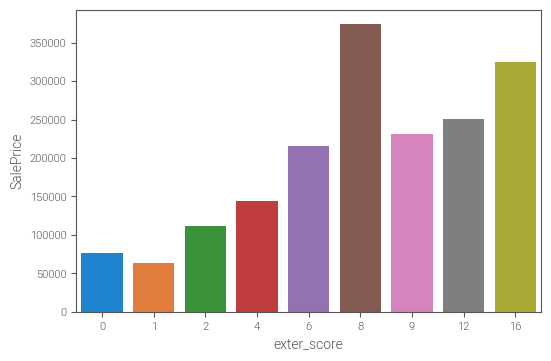

In [62]:
df['exter_score'] = df['ExterQual_0'] * df['ExterCond_0']

test['exter_score'] = test['ExterQual_0'] * test['ExterCond_0']

sns.barplot(x='exter_score', y='SalePrice', data=df, ci=None);

KitchenAbvGr,KitchenQual: we combine them to get an kitchen score

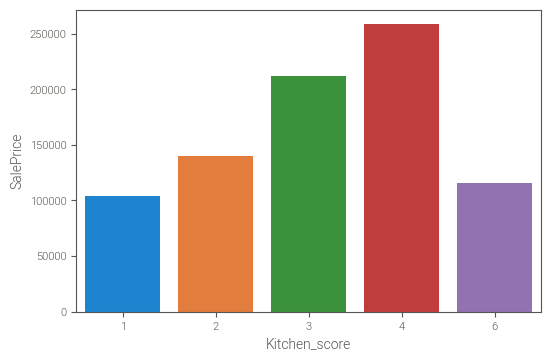

In [63]:
df['Kitchen_score']= df['KitchenAbvGr'] *df['KitchenQual_0']

test['Kitchen_score']= test['KitchenAbvGr'] *test['KitchenQual_0']


sns.barplot(x='Kitchen_score', y='SalePrice', data=df, ci=None);

YearBuilt: We use kmeans algorithm to divide the houses into clusters.

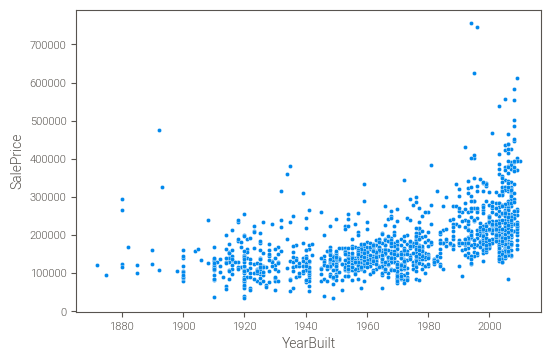

In [64]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df);

C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

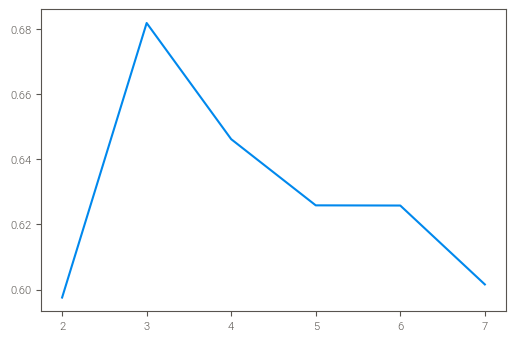

In [65]:
trial = df.copy()

features = ['YearBuilt']
X_scaled = trial.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

s = []
for n in range(2, 8):
    kmeans = KMeans(n_clusters = n, random_state=0)
    kmeans.fit(X_scaled)
    s.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 8), s, '-');

C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


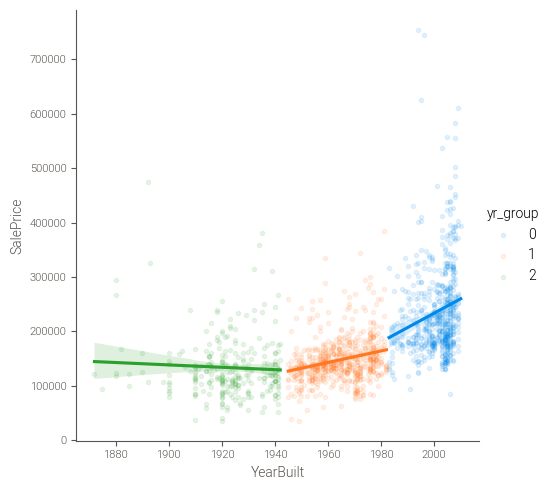

In [66]:
# We see that best silhouette score is obtained at n_clusters=3.
def kmeans_yearblt(X, train_data):

    #feature based on which clustering is done
    features = ['YearBuilt']

    #kmeans
    kmeans = KMeans(n_clusters = 3, random_state=0)
    kmeans.fit(train_data[features])
    X['yr_group'] = kmeans.predict(X[features])

    return X

df = kmeans_yearblt(df, df)
test = kmeans_yearblt(test, test)
#plotting distribution
sns.lmplot(x='YearBuilt', y='SalePrice', hue='yr_group', data=df, scatter_kws=dict(alpha=0.1));

Basement

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

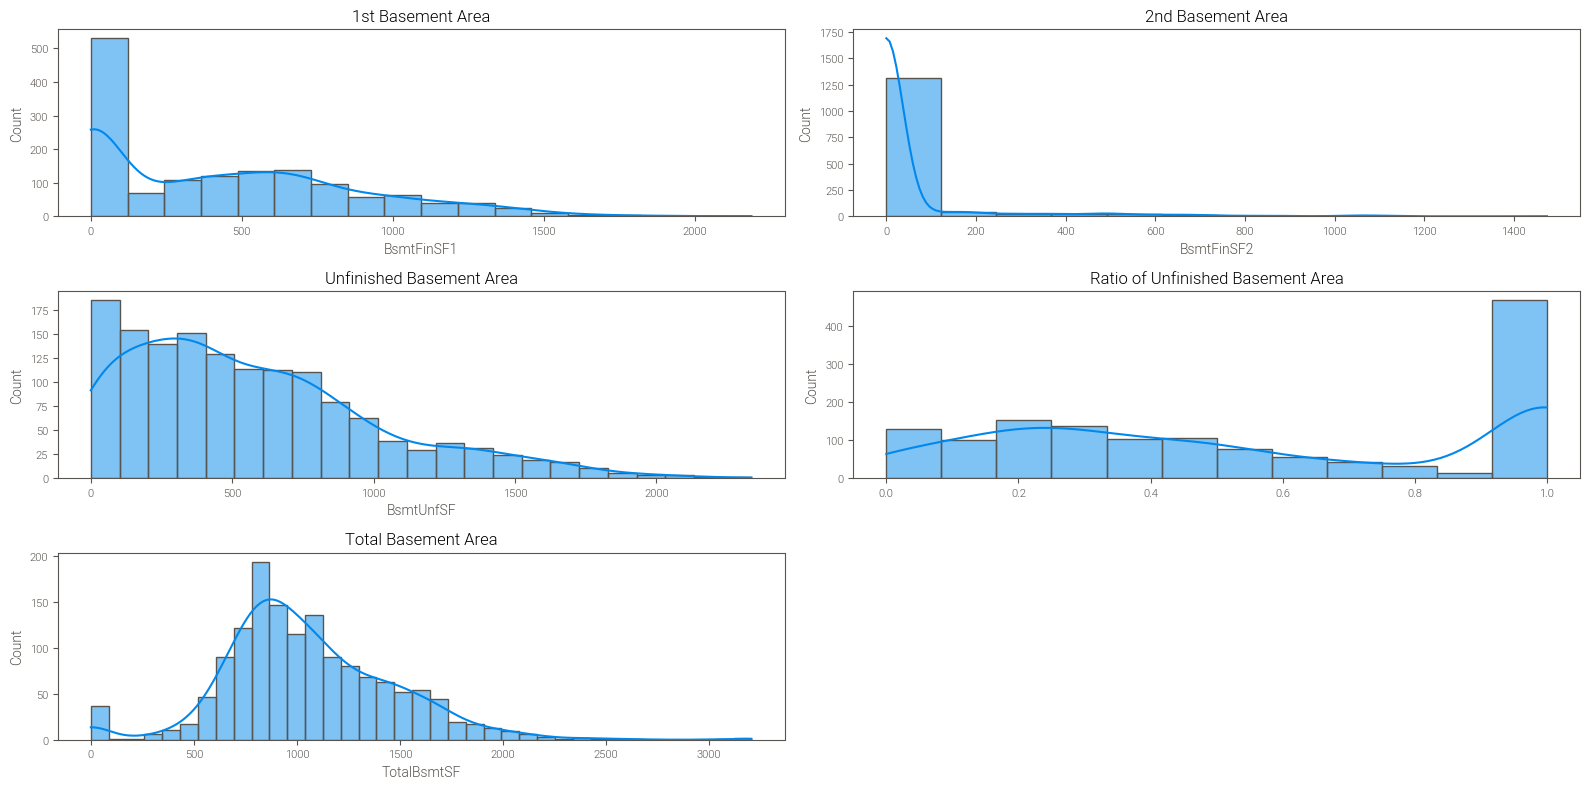

In [67]:
#basement area distribution in dataset
fig,axes = plt.subplots(3,2, figsize=(16, 8))
axes = axes.ravel()

#1st basement area
sns.histplot(x='BsmtFinSF1', data=df, kde=True, ax=axes[0])
axes[0].set(title='1st Basement Area');

#2nd basement area
sns.histplot(x='BsmtFinSF2', data=df, kde=True, ax=axes[1])
axes[1].set(title='2nd Basement Area');

#unfinished basement area
sns.histplot(x='BsmtUnfSF', data=df, kde=True, ax=axes[2])
axes[2].set(title='Unfinished Basement Area');

#unfinished basement area ratio
sns.histplot(x=df['BsmtUnfSF']/df['TotalBsmtSF'], data=df, kde=True, ax=axes[3])
axes[3].set(title='Ratio of Unfinished Basement Area');

#total basement area ratio
sns.histplot(x=df['TotalBsmtSF'], data=df, kde=True, ax=axes[4])
axes[4].set(title='Total Basement Area');

fig.delaxes(axes[5])
plt.tight_layout()

The data is highly skewed. We shall use log transformation on this feature

Also, most of the houses have higher unfnished basement area, thus we create basement score incorportating both finished and unfinshed basements

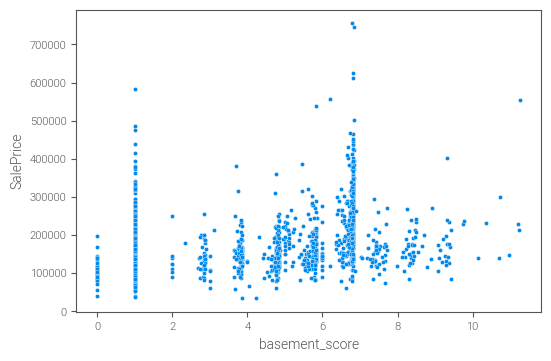

In [76]:



def basement_score(trail):
    
    #logtransform
    X=  trail.copy()
    basement_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
    for col in basement_cols:
        X[col] = np.log1p(X[col])

    #houses with no basement
    no_basement_idx = X[X['TotalBsmtSF'] == 0].index
    #houses with basement
    basement_idx = X[~(X['TotalBsmtSF'] == 0)].index
    
    #house with no basement is given 0 score
    X.loc[no_basement_idx, 'basement_score'] = 0
    
    #houses with basement is alloted score based on area and rating
    X.loc[basement_idx, 'basement_score'] = trail.loc[basement_idx].apply(lambda x: 
                                                   ((x['BsmtFinType1_0']*x['BsmtFinSF1'])+
                                                    (x['BsmtFinType2_0']*x['BsmtFinSF2'])+
                                                    (x['BsmtUnfSF']))/x['TotalBsmtSF'], axis=1)
    return X

df = basement_score(df)
test = basement_score(test)


sns.scatterplot(x='basement_score', y='SalePrice', data=df);

The price of a house depends upon how it compares to other houses in the same neighborhood

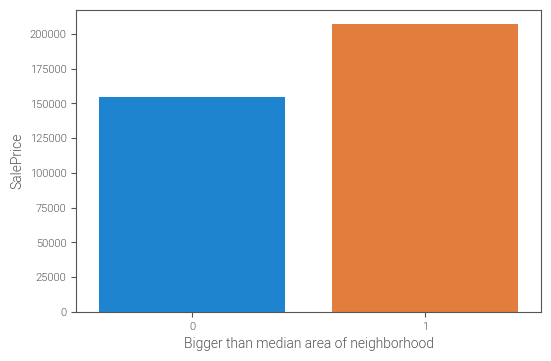

In [77]:
def neigh_area(X, train_data):
    #dictionary mapping each neighborhood to its median GrLivArea
    median_area = train_data.groupby(['Neighborhood'])['GrLivArea'].agg('median').to_dict()
    
    #feature indicating whether the house is bigger than median living area of neighborhood
    X['big_med_area'] = X.apply(lambda x: x['GrLivArea'] > median_area[x['Neighborhood']], axis=1)
    X['big_med_area'] = X['big_med_area'].astype(int)
    
    return X

df = neigh_area(df, train_data=df)

test = neigh_area(test, train_data=test)

#plot
sns.barplot(x='big_med_area', y='SalePrice', data=df, ci=None)
plt.xlabel('Bigger than median area of neighborhood');

We create a feature indicating number of years since last remodelling of the house

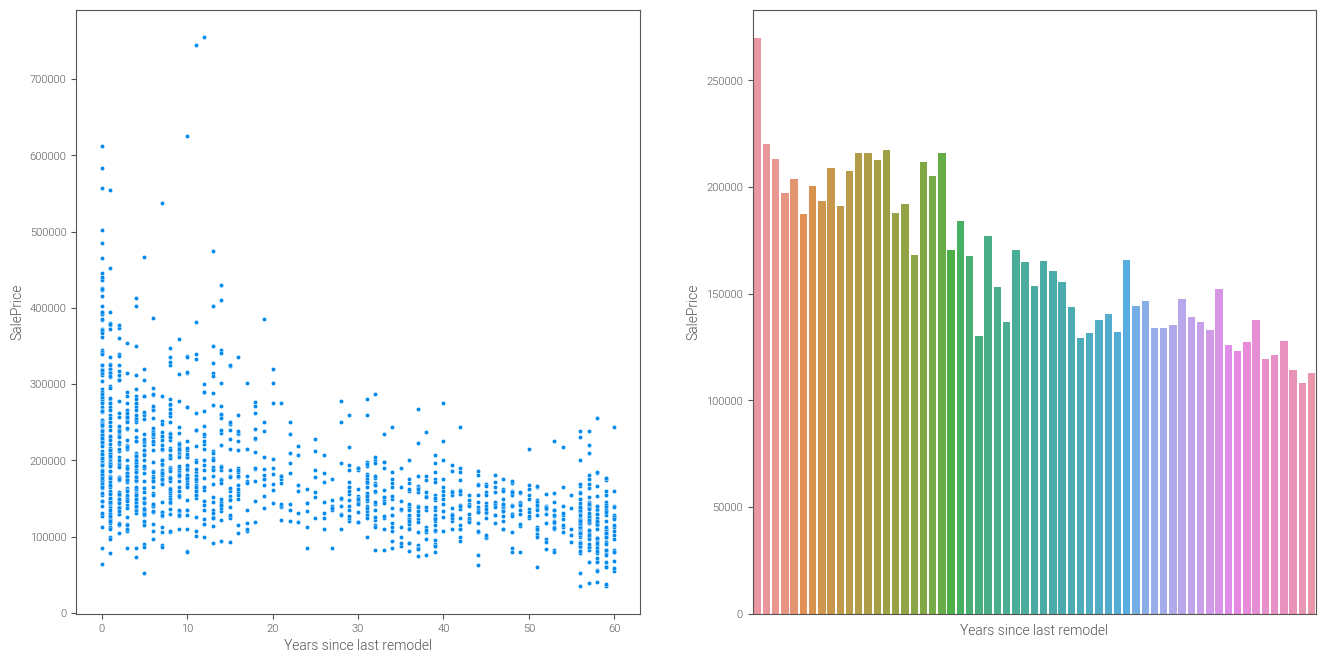

In [79]:
df["Yrs_Remodel"]=df["YrSold"]-df["YearRemodAdd"]

test["Yrs_Remodel"]=test["YrSold"]-test["YearRemodAdd"]

#plot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
#scatterplot
sns.scatterplot(x='Yrs_Remodel', y='SalePrice', data=df, ax=ax1)
ax1.set_xlabel('Years since last remodel')
#barplot
sns.barplot(x='Yrs_Remodel', y='SalePrice', data=df, ci=None, ax=ax2)
ax2.set_xlabel('Years since last remodel')
ax2.set_xticks([]);


We can see that higher the number of years since last remodelling of the house, lower is the price

We divide the last_remodel feature into clusters using KMeans

C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

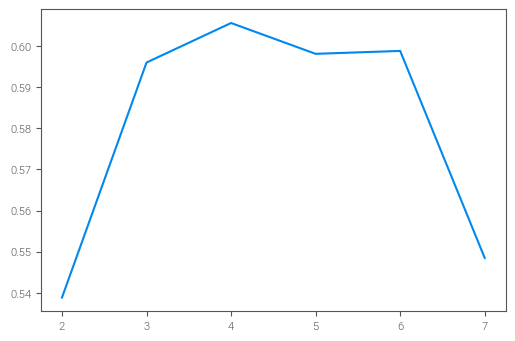

In [80]:
#we copy our data to check for optimal number of clusters
trial = df.copy()

features = ['Yrs_Remodel', 'YearBuilt']
X_scaled = trial.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

s = []
for n in range(2, 8):
    kmeans = KMeans(n_clusters = n, random_state=0)
    kmeans.fit(X_scaled)
    s.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 8), s, '-');

We see that best silhouette score is obtained at n_clusters=4

So we use n_clusters=4 as our hyperparameter in kmeans algorithm

C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


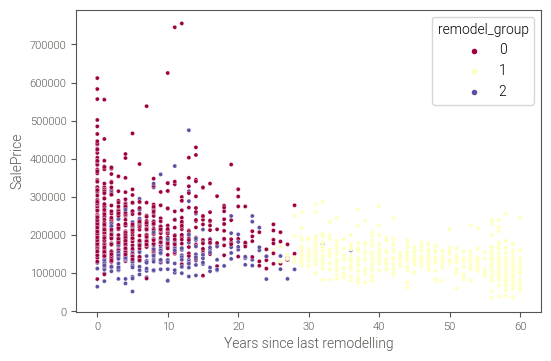

In [81]:
def last_remodel(X, train_data):

    #feature based on which clustering is done
    train_data['Yrs_Remodel'] = train_data['YrSold'] - train_data['YearRemodAdd']
    features = ['Yrs_Remodel', 'YearBuilt']

    #scaling training data feature
    train_scaled = train_data.loc[:, features]
    train_scaled = (train_scaled - train_scaled.mean(axis=0)) / train_scaled.std(axis=0)

    #kmeans
    kmeans = KMeans(n_clusters = 3, random_state=0)
    kmeans.fit(train_scaled)
    
    #scaling
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    
    X['remodel_group'] = kmeans.predict(X_scaled[features])
    #convert into categorical type

    
    return X

df = last_remodel(df, df)
test = last_remodel(test, test)

#plotting distribution
sns.scatterplot(x='Yrs_Remodel', y='SalePrice', hue='remodel_group', data=df, palette='Spectral');
plt.xlabel('Years since last remodelling');

C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


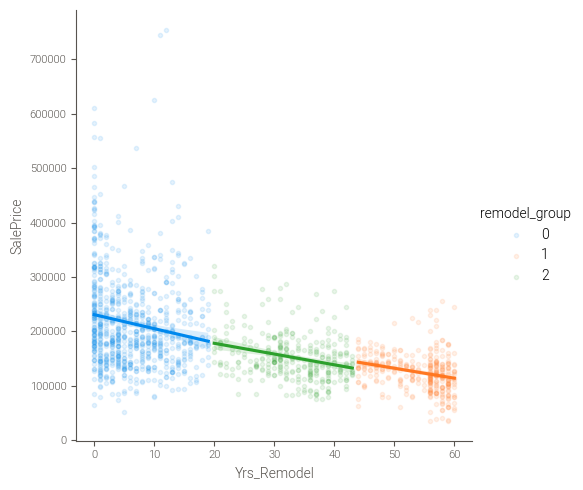

In [82]:
# We see that best silhouette score is obtained at n_clusters=3.
def kmeans_yearblt(X, train_data):

    #feature based on which clustering is done
    features = ['Yrs_Remodel']

    #kmeans
    kmeans = KMeans(n_clusters = 3, random_state=0)
    kmeans.fit(train_data[features])
    X['remodel_group'] = kmeans.predict(X[features])

    return X

df = kmeans_yearblt(df, df)
test = kmeans_yearblt(test, test)
#plotting distribution
sns.lmplot(x='Yrs_Remodel', y='SalePrice', hue='remodel_group', data=df, scatter_kws=dict(alpha=0.1));

We see that most of the houses do not have veneer. We create a feature indicating whether the house has veneer

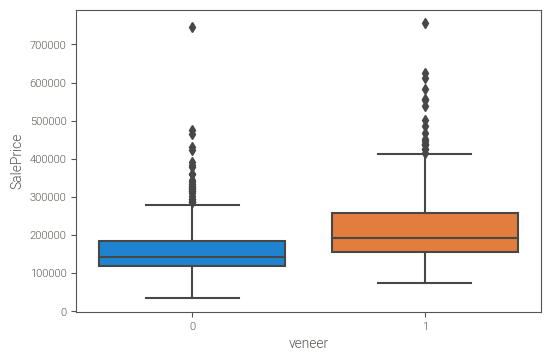

In [83]:
df['veneer'] = df['MasVnrArea'].apply(lambda x: (0, 1)[x>0])

test['veneer'] = test['MasVnrArea'].apply(lambda x: (0, 1)[x>0])

sns.boxplot(x='veneer', y='SalePrice', data=df);

Neighborhood

>Neighborhood: Physical locations within Ames city limits

We know that price of a house is determined by its locality

In [84]:
df['Neighborhood'].value_counts()

NAmes      224
CollgCr    150
OldTown    113
Edwards     97
Somerst     85
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     26
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

We observe high cardinality

We use target encoding for Neighborhood feature

In [85]:

class CrossFoldEncoder:
    def __init__(self, encoder, **kwargs):
        self.encoder_ = encoder
        self.kwargs_ = kwargs  # keyword arguments for the encoder
        self.cv_ = KFold(n_splits=5) #cross validation splits

    # Fit an encoder on one split and transform the feature on the
    # other. Iterating over the splits in all folds gives a complete
    # transformation. We also now have one trained encoder on each
    # fold.
    def fit_transform(self, X, cols):
        self.fitted_encoders_ = []
        self.cols_ = cols
        X_encoded = []
        y=X.pop('SalePrice')
        for idx_train, idx_encode in self.cv_.split(X):
            #instantiate encoder
            fitted_encoder = self.encoder_(cols=cols, **self.kwargs_)
            #fitting encoder on 4 parts of training CV
            fitted_encoder.fit(
                X.iloc[idx_train, :], y.iloc[idx_train],
            )
            #transforming on 1 part after fitting
            X_encoded.append(fitted_encoder.transform(X.iloc[idx_encode, :])[cols])
            #storing fitted encoders
            self.fitted_encoders_.append(fitted_encoder)
        #creating dataframe by concatenating 5 results
        X_encoded = pd.concat(X_encoded)
        #renaming the column
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        X = X.join(X_encoded)
        X = X.join(y.to_frame(name='SalePrice'))
        return X

    # To transform the test data, average the encodings learned from
    # each fold.
    def transform(self, X):
        X_encoded_list = []
        for fitted_encoder in self.fitted_encoders_:
            #tranforming
            X_encoded = fitted_encoder.transform(X)
            #appending target encoded features
            X_encoded_list.append(X_encoded[self.cols_])
        #taking average
        X_encoded = reduce(
            lambda x, y: x.add(y, fill_value=0), X_encoded_list
        ) / len(X_encoded_list)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        X = X.join(X_encoded)
        return X

In [86]:
def target_encoder(X, training_data):
    encoder = CrossFoldEncoder(MEstimateEncoder, m=2)
    if ('SalePrice' in X.columns):
        X = encoder.fit_transform(X, cols=['Neighborhood'])
    else:
        _ = encoder.fit_transform(training_data, cols=['Neighborhood'])
        X = encoder.transform(X)
    
    return X

In [87]:
df=target_encoder(df,df)
# test=target_encoder(test,df)

In [88]:
df[['Neighborhood', 'Neighborhood_encoded']].value_counts()

Neighborhood  Neighborhood_encoded
NAmes         145773.613029           47
              146223.029012           46
              144040.079531           46
              146363.605056           43
              146601.669527           42
                                      ..
SWISU         144404.212621            2
Blueste       171917.407407            1
              161221.397646            1
NPkVill       149541.419294            1
Veenker       224404.894344            1
Length: 122, dtype: int64

In [89]:
# df['mean_N_encoded']= df.groupby('Neighborhood')['Neighborhood_encoded','Neighborhood'].mean()

In [90]:
mean_enocde= {'Blueste': 166615.24067699368,
'Sawyer': 138142.8162594988,
'SWISU': 146897.47672979595,
'Edwards': 128838.06099125525,
'OldTown': 129120.76878973105,
'IDOTRR': 105081.56938059606,
'Crawfor': 208618.69984798378,
'NAmes': 144582.94615935674,
'NWAmes': 188941.59485501828,
'Gilbert': 192537.55625340954,
'NoRidge': 323182.69526876154,
'Timber': 238308.1541727995,
'MeadowV': 110175.67135423042,
'NPkVill': 151140.42429063196,
'BrDale': 114955.49449558073,
'Blmngtn': 193336.84266202463,
'BrkSide': 126758.78876588785,
'Somerst': 224283.8576837785,
'NridgHt': 310695.6776328819,
'Mitchel': 157744.29004207143,
'SawyerW': 186695.015663123,
'ClearCr': 211724.50575285163,
'StoneBr': 297788.0324605937,
'CollgCr': 197790.31817048488,
'Veenker': 229067.0159910698}

In [91]:
df['N_coded_mean']= df['Neighborhood'].map(mean_enocde)

test['N_coded_mean']= test['Neighborhood'].map(mean_enocde)

df.drop("Neighborhood_encoded", axis=1, inplace=True)

## Extra Feature Engineering

In [92]:
#Garage Score


def feature_engineer(X):
    

    X['garage_score'] = X.apply(lambda x: 
                                  (2*x['GarageCars'])+(1.5*x['GarageFinish_0'])+(1*x['GarageCond_0'])+
                                (1*x['GarageType_0'])+(0.5*x['GarageQual_0']), axis=1)


    #House Age

    X['HouseAge']=abs(X['YrSold']-X['YearBuilt']) # one house in the test part is sold before building


    #new feature measuring living area above grade out of total lot area 
    X['liv_ratio'] = X['GrLivArea']/X['LotArea']

    #new feature measuring average room size
    X['room_size'] = (X['1stFlrSF']+X['2ndFlrSF'])/X['TotRmsAbvGrd'] #1stFlrSF + 2ndFlrSF = GrLivArea

    #new feature measuring Total No.rooms (bedrooms , bathrooms and kitchens)
    X['Total_Rooms']= X['TotRmsAbvGrd']+ X['FullBath']+ X['HalfBath']+X['KitchenAbvGr']  


    #new feature measuring low quality finished work
    X['lowqual_ratio'] = X['LowQualFinSF']/(X['GrLivArea'])



    #new feature measuring score for the living area quality
    X['GrLivArea_Score']= X['OverallQual']* X['GrLivArea']


    #new feature measuring score basement quality
    X['BsmtFinSF_score']=X['BsmtFinSF1'] * X['BsmtFinSF2'] 

    #new feature measuring Total living area No.bothrooms
    X['TotalBath_Abv']=X['FullBath']+X['HalfBath']*0.5


    #new feature measuring Total basement No.bothrooms
    X['TotalBath_Bsmt']=X['BsmtFullBath']+X['BsmtHalfBath']*0.5
    
    #new feature measuring the ratio between TotalBsmtSF and 1stFlrSF
    X['Bsm_1stFlr_ratio']=X['TotalBsmtSF']/(X['1stFlrSF'])
    
    #new feature measuring the Garage Area and the number of Cars
    X['CarArea']=X['GarageArea']/X['GarageCars'] 
    X['CarArea'] = X['CarArea'].fillna(0)

    return X

df= feature_engineer(df)
test= feature_engineer(test)

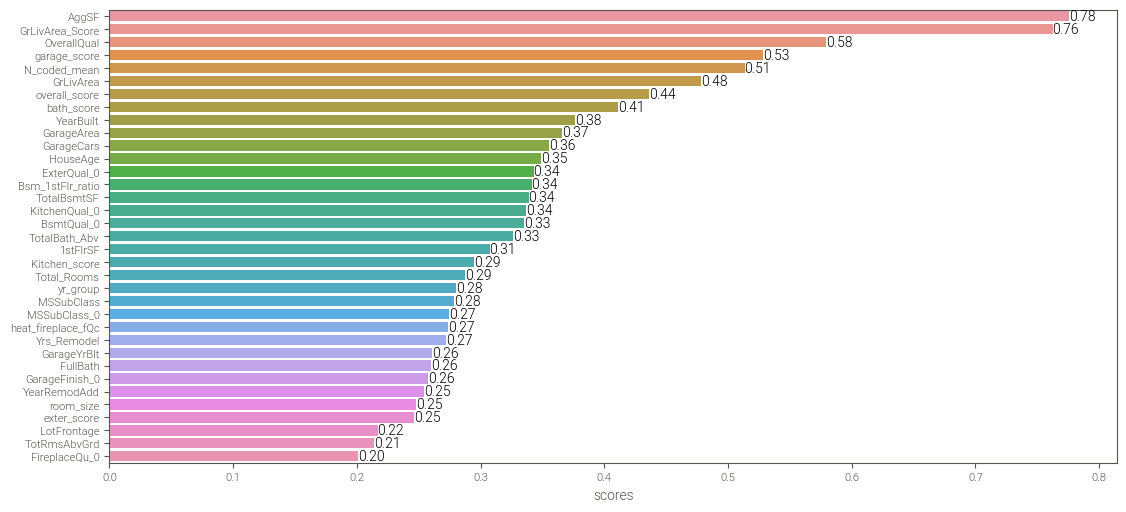

In [93]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:35], y=df_mi_score.index[:35], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

## Label the categorical features

In [94]:
# Converting non-numeric predictors stored as numbers into string

def numeric_to_string(X):
    X['MSSubClass_'] = X['MSSubClass'].apply(str)
    X['YrSold_'] = X['YrSold'].apply(str)
    X['MoSold_'] = X['MoSold'].apply(str)
    X['YearBuilt_'] = X['YearBuilt'].apply(str)
    X['YearRemodAdd_'] = X['YearRemodAdd'].apply(str)
    X['GarageYrBlt_'] = X['GarageYrBlt'].apply(str)
    return X
df= numeric_to_string(df)
test= numeric_to_string(test)

In [96]:
def label_encode(X):

    cols= X.select_dtypes(include=['object']).columns

    for col in cols:
        X[f'{col}_labeled'] = X[col].astype('category')
        X[f'{col}_labeled'] = X[f'{col}_labeled'].cat.codes
    return X
df = label_encode(df)
test = label_encode(test)

In [97]:
final_df= df.copy()
final_test= test.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 190 entries, MSSubClass to GarageYrBlt__labeled
dtypes: float64(19), int32(3), int64(72), int8(48), object(48)
memory usage: 1.7+ MB


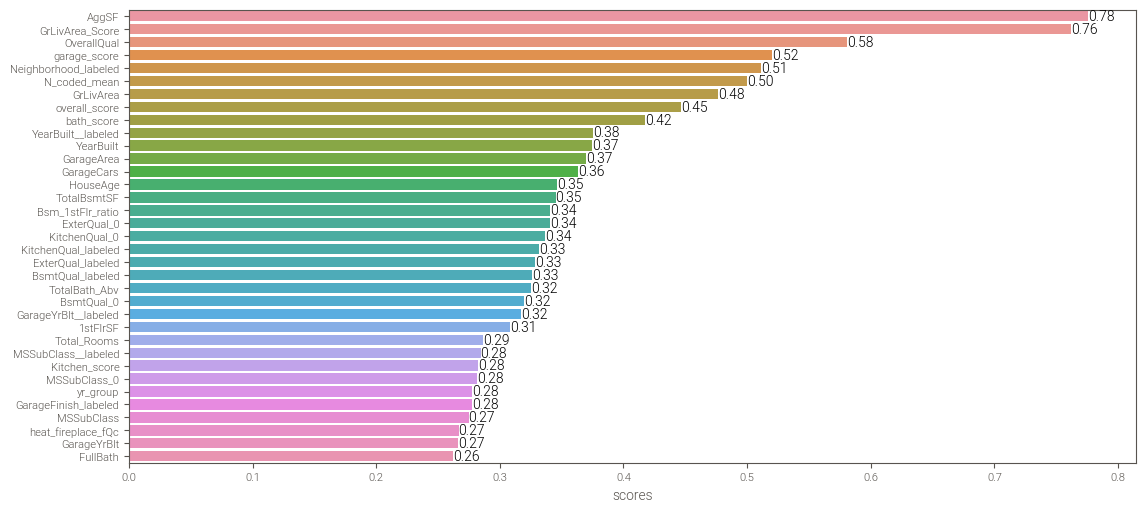

In [98]:
new_train= final_df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=final_df[num_col], y=final_df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:35], y=df_mi_score.index[:35], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [99]:
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_labeled,MiscFeature_labeled,SaleType_labeled,SaleCondition_labeled,MSSubClass__labeled,YrSold__labeled,MoSold__labeled,YearBuilt__labeled,YearRemodAdd__labeled,GarageYrBlt__labeled
0,60,RL,65.0,8450,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,4,9,2,4,104,53,90
1,20,RL,80.0,9600,Pave,Does Not Have,Reg,Lvl,FR2,Gtl,...,0,0,8,4,4,1,7,77,26,63
2,60,RL,68.0,11250,Pave,Does Not Have,IR1,Lvl,Inside,Gtl,...,0,0,8,4,9,2,11,102,52,88
3,70,RL,60.0,9550,Pave,Does Not Have,IR1,Lvl,Corner,Gtl,...,0,0,8,0,10,0,4,19,20,85
4,60,RL,84.0,14260,Pave,Does Not Have,IR1,Lvl,FR2,Gtl,...,0,0,8,4,9,2,3,101,50,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,4,9,1,10,100,50,86
1456,20,RL,85.0,13175,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,3,0,8,4,4,4,4,79,38,65
1457,70,RL,66.0,9042,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,1,3,8,4,10,4,7,44,56,30
1458,20,RL,68.0,9717,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,4,4,4,6,51,46,37


In [100]:
final_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_labeled,MiscFeature_labeled,SaleType_labeled,SaleCondition_labeled,MSSubClass__labeled,YrSold__labeled,MoSold__labeled,YearBuilt__labeled,YearRemodAdd__labeled,GarageYrBlt__labeled
0,20,RH,80.0,11622,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,3,0,8,4,5,4,8,56,11,47
1,20,RL,81.0,14267,Pave,Does Not Have,IR1,Lvl,Corner,Gtl,...,0,1,8,4,5,4,8,53,8,44
2,60,RL,74.0,13830,Pave,Does Not Have,IR1,Lvl,Inside,Gtl,...,3,0,8,4,10,4,5,92,48,83
3,60,RL,78.0,9978,Pave,Does Not Have,IR1,Lvl,Inside,Gtl,...,0,0,8,4,10,4,8,93,48,84
4,120,RL,43.0,5005,Pave,Does Not Have,IR1,HLS,Inside,Gtl,...,0,0,8,4,0,4,0,87,42,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,4,2,0,8,65,20,0
1455,160,RM,21.0,1894,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,0,2,0,6,65,20,56
1456,20,RL,160.0,20000,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,0,0,8,0,5,0,11,55,46,46
1457,85,RL,62.0,10441,Pave,Does Not Have,Reg,Lvl,Inside,Gtl,...,3,3,8,4,14,0,9,87,42,0


In [101]:
missing_val(final_df)

,missing_ratio


In [102]:
missing_val(final_test)

,missing_ratio


In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 190 entries, MSSubClass to GarageYrBlt__labeled
dtypes: float64(19), int32(3), int64(72), int8(48), object(48)
memory usage: 1.7+ MB


In [104]:
final_df.to_csv("final_dataframe.csv", index=False)

In [105]:
final_test.to_csv("final_dataframe_test.csv", index=False)